# Text Document Clustering

## Definition of the Problem

In order to understand the practical application of Text Document Clustering we must first understand the problem we are trying to solve

The problem in question would be the existance of large bodies of text, that we would like to segment and categorize according to similaraties in context and subject matter.

Considering the fact that most of the data, text included, that has ever been generated by humanity has been generated in the last 30 years, and most of it is 
unlabled and uncathegorized this is a very much present problem and increasing with the pasage of time 

The purpose of this article is to show the effectivenes of machine learnig in obtaining a usefull categorization of text so that finding the subject of interest is easier and faster than it would be lacking a clear categorization.

For that purpose we shall be using several data sources:
- NPR News Articles https://www.kaggle.com/datasets/gauravduttakiit/npr-data
- Spotify Million Song Dataset https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
- Women's Clothing Review https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

As it can be noticed these data source are varied in data and subject matter. We intend to see if we can find a good category for the text data present in these data sources.

## Libraries and Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
no_bible_words = 807361

font = {'fontname':'sans'}
color = '#0097b9'
plt.rcParams["font.family"] = "sans"
font_path='Open_Sans/OpenSans-VariableFont_wdth,wght.ttf'

# NPR

In [64]:
data = pd.read_csv('npr.csv')
data.head()

Article
0  In the Washington of 2016, even when the polic...
1    Donald Trump has used Twitter  —   his prefe...
2    Donald Trump is unabashedly praising Russian...
3  Updated at 2:50 p. m. ET, Russian President Vl...
4  From photography, illustration and video, to d...

Of course there is no topic to the artical or category for that matter thus we would need to set it ourselves 

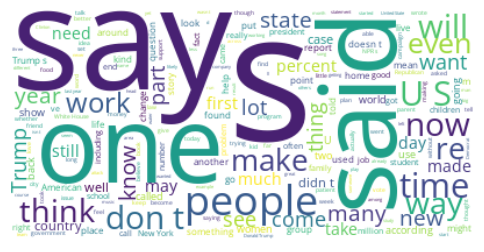

In [66]:
# Get all the text
text =  data.Article.to_list()
text = ' '.join(text)
wordcloud = WordCloud(font_path='Open_Sans/OpenSans-VariableFont_wdth,wght.ttf'
                      , background_color='white'
                      , random_state=42).generate(text)

# Plot Word Cloud
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('pics/npr_wordcloud', bbox_inches="tight");

In [67]:
no_words = len(text.split())
print(f'No Words {no_words},  Bible count: {no_words/no_bible_words}')

No Words 9266936,  Bible count: 11.478057523214522


In [68]:
text = text.split()
text = pd.Series(text)

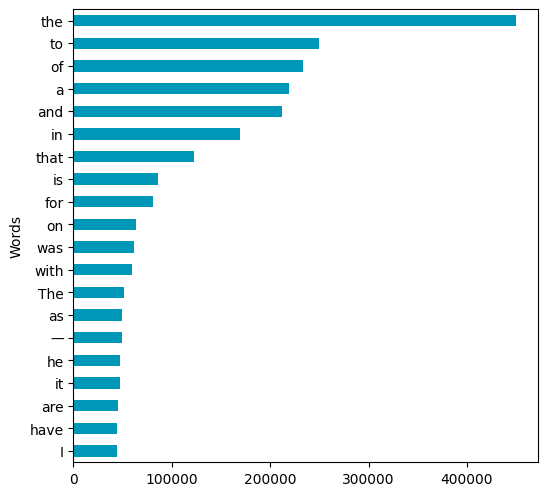

In [69]:
plt.figure(figsize=(6,6), dpi=100)
text.value_counts().head(20).plot.barh(color=color).invert_yaxis()
plt.ylabel('Words', **font)
plt.savefig('pics/npr_word_freq', pad_inches='tight');

## Preprocessing

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [70]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data['Article'])

## Fitting the Data

### LDA

In [71]:
LDA = LatentDirichletAllocation(n_components=7
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=100).fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

In [72]:
print(len(cv.get_feature_names_out()), LDA.components_[0].shape)
keys = cv.get_feature_names_out()

54777 (54777,)


In [73]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

### Word Frequency Word Cloud

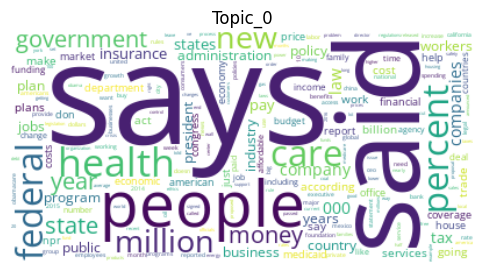

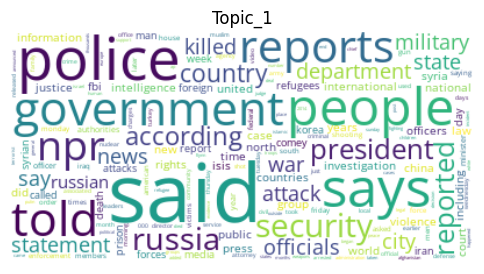

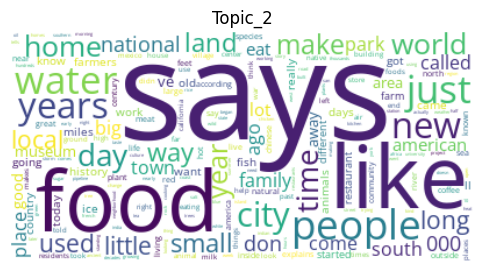

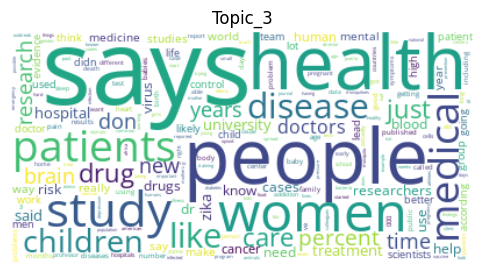

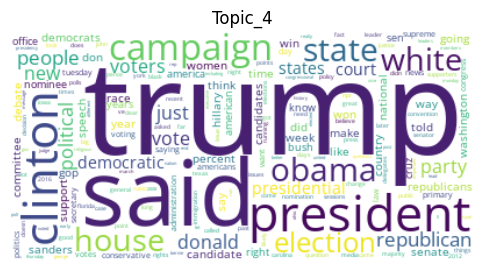

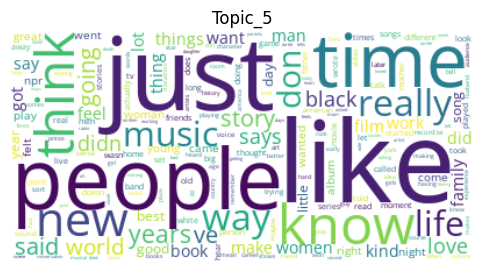

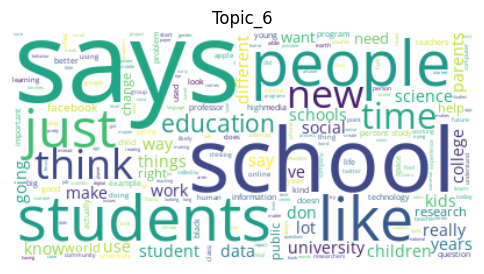

In [74]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42)
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f"Topic_{n}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

### Word Frequency Barplot

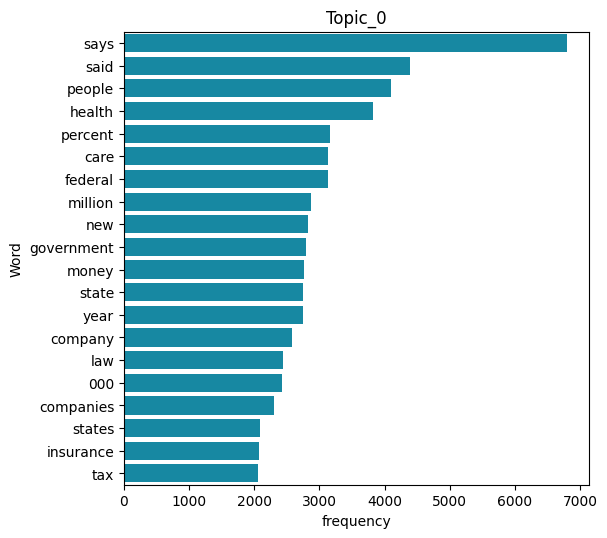

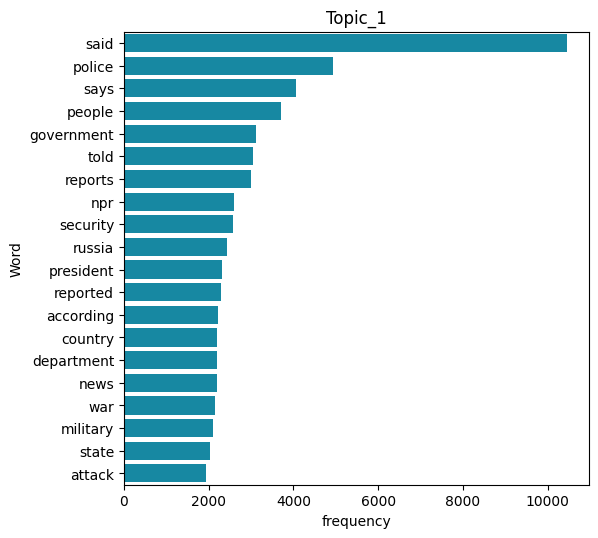

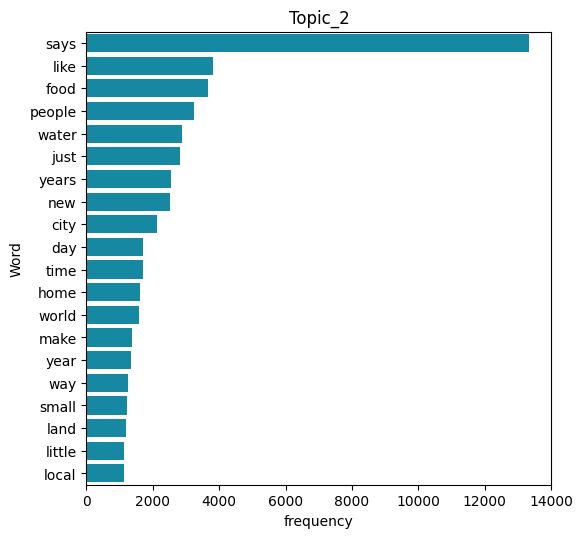

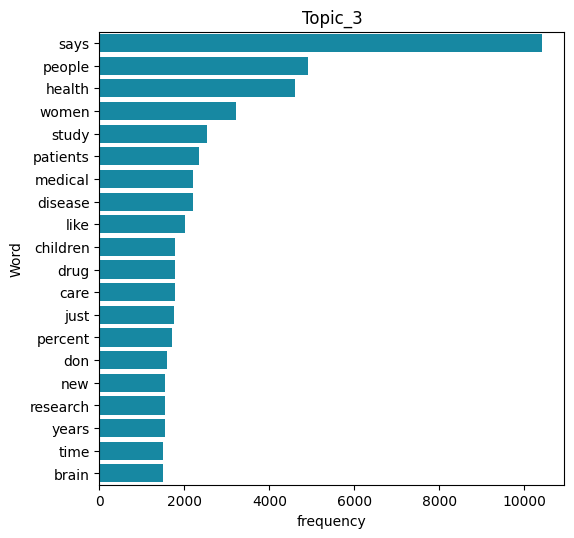

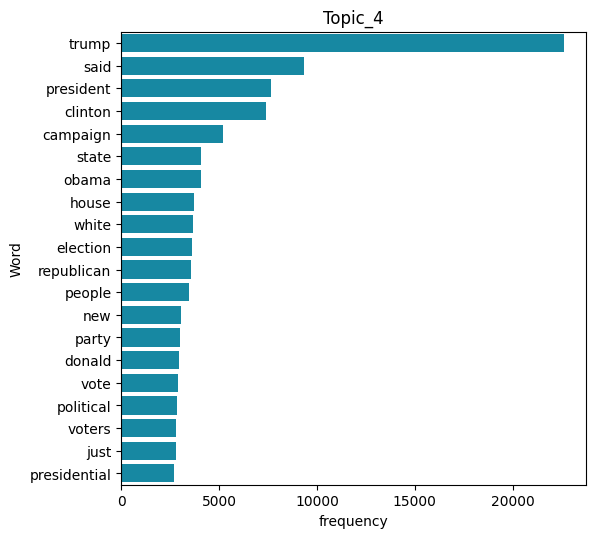

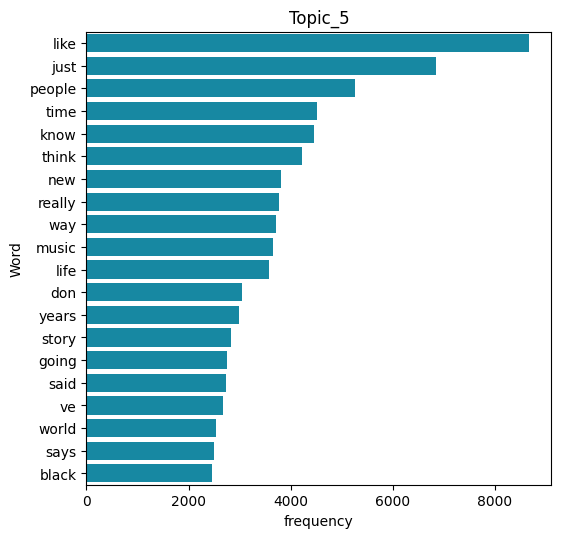

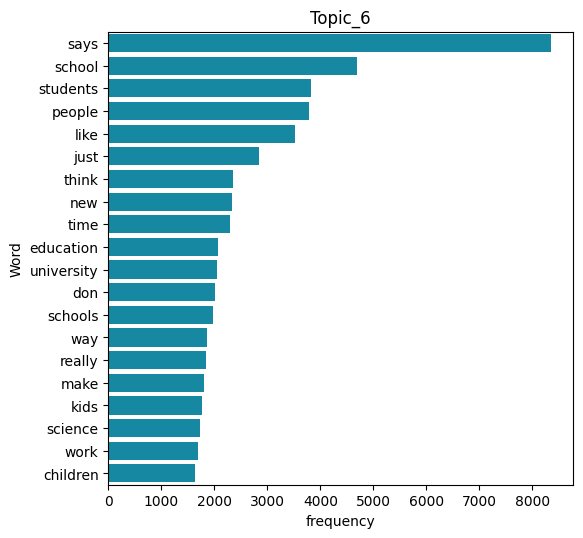

In [75]:
c=20
n=0
for topic in topics:

    df = pd.DataFrame(data=topic, index=[0])
    df = df.transpose()
    df.columns=['frequency']
    df = df.sort_values(by='frequency', ascending=False)


    plt.figure(figsize=(6,6), dpi=100)
    sns.barplot(y=df.index[:c], x=df.frequency[:c], color=color)
    plt.title(f"Topic_{n}",**font)
    plt.ylabel('Word',**font)
    plt.xlabel('frequency', **font)
    plt.savefig(f"pics/NPR_Topic_{n}", bbox_inches = "tight", dpi=300);

    n=n+1

In [76]:
n=0
for topic in LDA.components_:
    print(f"Topic_{n}: {keys[topic.argsort()][-20:]}")
    n=n+1

Topic_0: ['tax' 'insurance' 'states' 'companies' '000' 'law' 'company' 'year'
 'state' 'money' 'government' 'new' 'million' 'federal' 'care' 'percent'
 'health' 'people' 'said' 'says']
Topic_1: ['attack' 'state' 'military' 'war' 'news' 'department' 'country'
 'according' 'reported' 'president' 'russia' 'security' 'npr' 'reports'
 'told' 'government' 'people' 'says' 'police' 'said']
Topic_2: ['local' 'little' 'land' 'small' 'way' 'year' 'make' 'world' 'home' 'time'
 'day' 'city' 'new' 'years' 'just' 'water' 'people' 'food' 'like' 'says']
Topic_3: ['brain' 'time' 'years' 'research' 'new' 'don' 'percent' 'just' 'care'
 'drug' 'children' 'like' 'disease' 'medical' 'patients' 'study' 'women'
 'health' 'people' 'says']
Topic_4: ['presidential' 'just' 'voters' 'political' 'vote' 'donald' 'party' 'new'
 'people' 'republican' 'election' 'white' 'house' 'obama' 'state'
 'campaign' 'clinton' 'president' 'said' 'trump']
Topic_5: ['black' 'says' 'world' 've' 'said' 'going' 'story' 'years' 'don' 'li

In [77]:
data['topic_raw'] = LDA.transform(dtm).argmax(axis=1)

In [78]:
topics = {0: 'Finance'
          , 1: 'International News'
          , 2: 'National or Local News'
          , 3: 'Medical Research'
          , 4: 'Presidential Election'
          , 5: 'Cultural News'
          , 6: 'Education'
         }

In [79]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])

In [80]:
n=350
sample =  data.sample(2)
for topic, article in zip(sample.topic, sample.Article):
    print(topic)
    print(article[:n], end='\n\n')

International News
Like many European countries, Germany wants to send more asylum seekers back home. The German parliament passed several laws on Thursday that make it easier to deport migrants. The day before, Chancellor Angela Merkel’s government sent a charter plane filled with Afghan migrants back to Kabul. Many asylum seekers say they’ve gotten the message  —  

Medical Research
Millennials, the thoroughbreds of texting, may lag behind previous generations when it comes to   hand strength. In a study of Americans ages   occupational therapists found that men younger than 30 have significantly weaker hand grips than their counterparts in 1985 did. The same was true of women ages   according to the study published online by 



In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
two_dims = pca.fit_transform(dtm.toarray())

In [82]:
two_dims.shape, data.topic_raw.shape

((11992, 2), (11992,))

<AxesSubplot:>

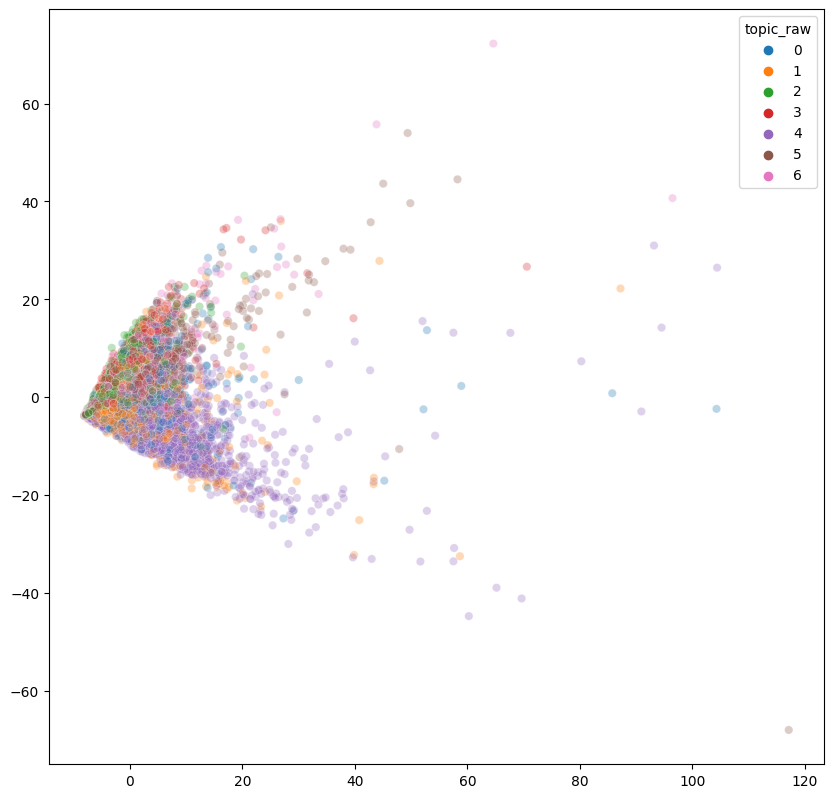

In [83]:
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x=two_dims[:,0], y=two_dims[:,1], hue = data.topic_raw, alpha=0.3, palette='tab10')

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
four_dims = pca.fit_transform(dtm.toarray())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


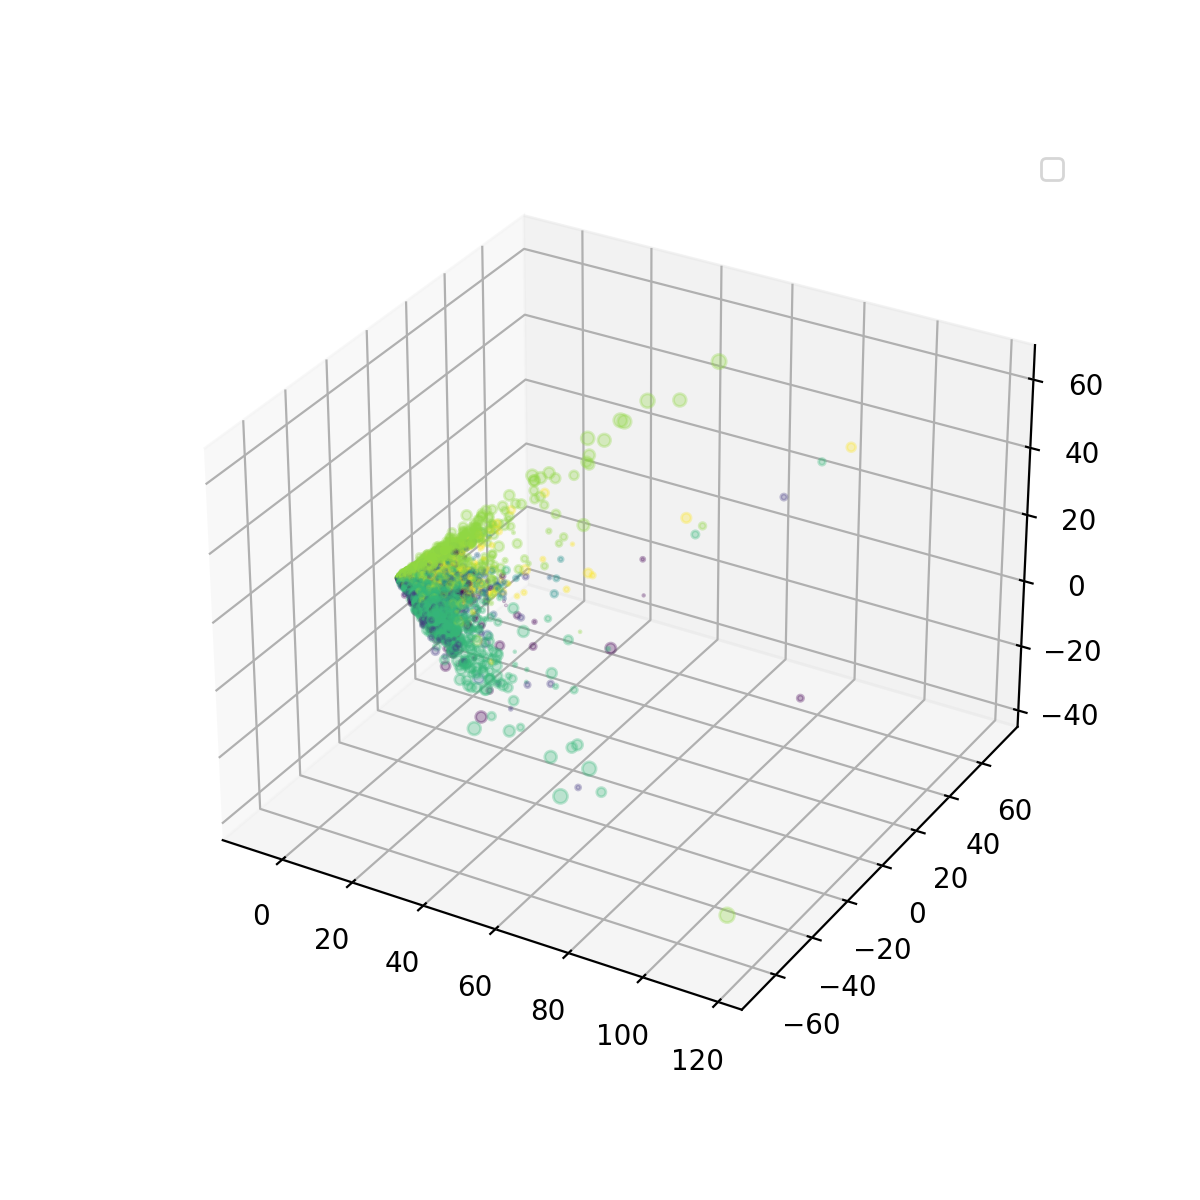

In [90]:
%matplotlib widget
plt.figure(figsize=(6,6), dpi=200)
axes = plt.axes(projection='3d')
axes.scatter(four_dims[:,0],four_dims[:,1],four_dims[:,2], s=-four_dims[:,3], c =data.topic_raw, alpha =0.3)
plt.legend()

In [103]:
axes.clear()

# Spotify

In [3]:
data = pd.read_csv('spotify_millsongdata.csv')
data.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \r\nA...  
1  Take it easy with me, please  \r\nTouch me gen...  
2  I'll never know why I had to go  \r\nWhy I had...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...

In [4]:
data.shape

(57650, 4)

Of course there is no topic to the artical or category for that matter thus we would need to set it ourselves 

In [ ]:
# Get all the text

text =  data.text.to_list()
text = ' '.join(text)
wordcloud = WordCloud(background_color='white'
                      , font_path=font_path
                      , random_state=42).generate(text)

# Plot Word Cloud
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('pics/Spotify_WordCloud', bbox_inches ='tight', dpi=300);

In [ ]:
no_words = len(text.split())
print(f'No Words {no_words},  Bible count: {no_words/no_bible_words}')

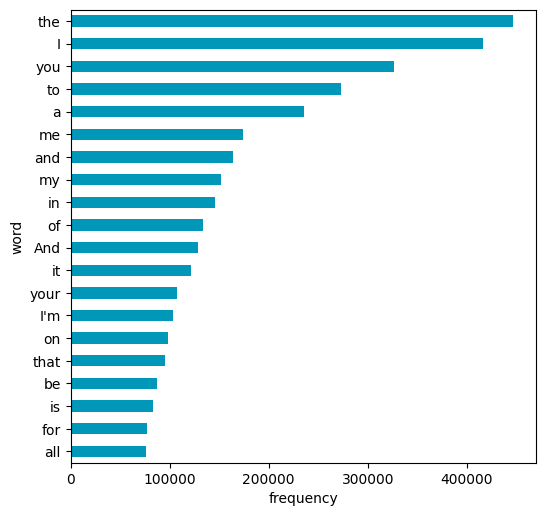

In [7]:
text = text.split()
text = pd.Series(text)

plt.figure(figsize=(6,6), dpi=100)
text = text.value_counts().head(20)
text.plot.barh(color=color).invert_yaxis()
plt.ylabel('word', **font)
plt.xlabel('frequency', **font)
plt.savefig('pics/spotify_word_freq', bbox_inches ='tight');

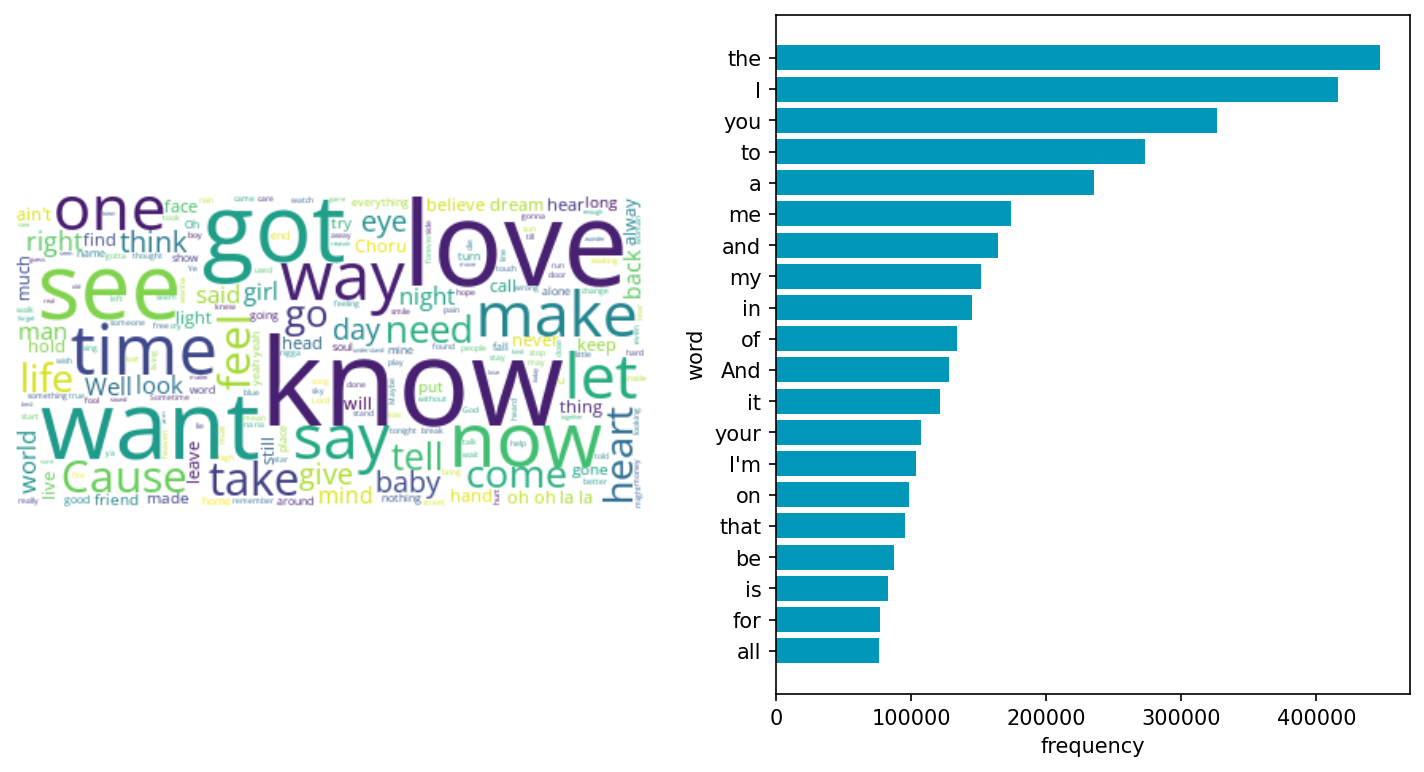

In [13]:
fig, axes= plt.subplots(ncols=2, figsize=(12,6), dpi=150)

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis("off");

axes[1].barh(width=text.values, y=text.index, color=color)
axes[1].invert_yaxis()
axes[1].set_ylabel('word',**font)
axes[1].set_xlabel('frequency', **font)

plt.savefig(f"pics/spotify_word_count", bbox_inches = "tight", dpi=300)

## Preprocessing

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [14]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data.text)

## Fitting the Data

### LDA

In [15]:
LDA = LatentDirichletAllocation(n_components=7
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=100).fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

In [18]:
print(len(cv.get_feature_names_out()), LDA.components_[0].shape)
keys = cv.get_feature_names_out()

40546 (40546,)


In [19]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

### Word Frequency Word Cloud

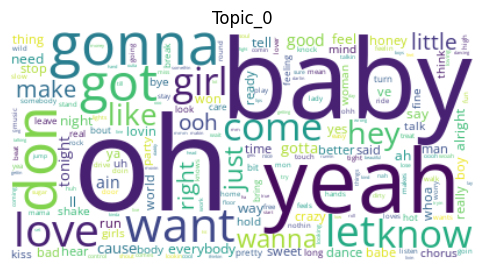

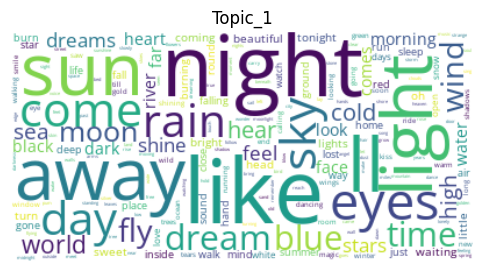

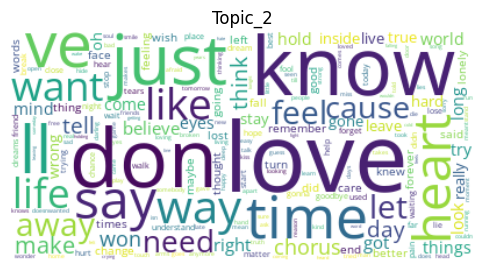

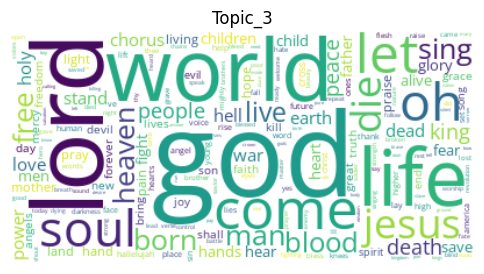

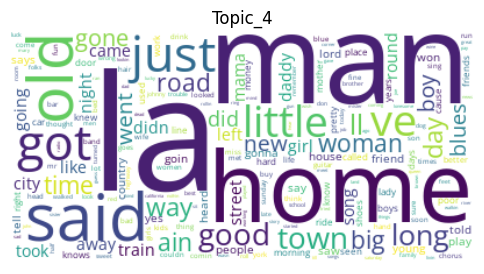

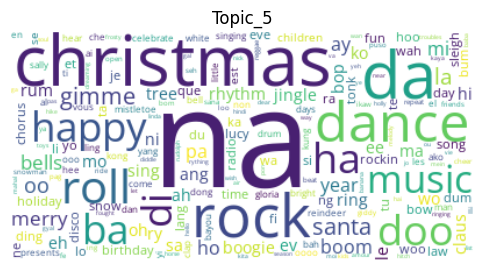

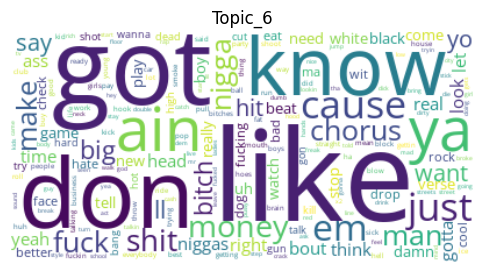

In [21]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42)
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f'Topic_{n}',**font)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'pics/Spotify_Topic_{n}', pad_inches='tight');
    n=n+1

### Word Frequency Barplot

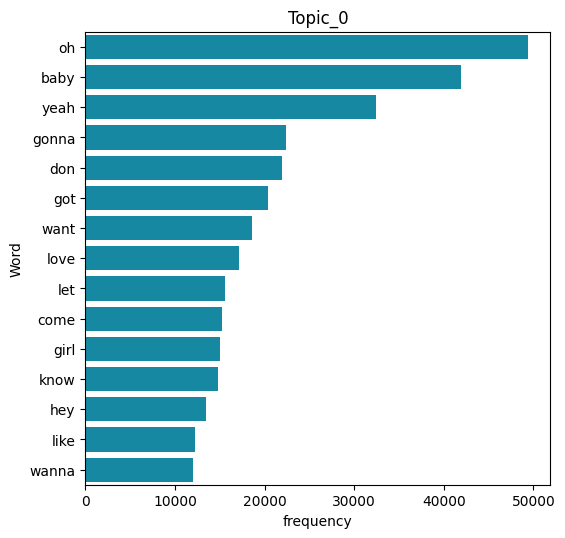

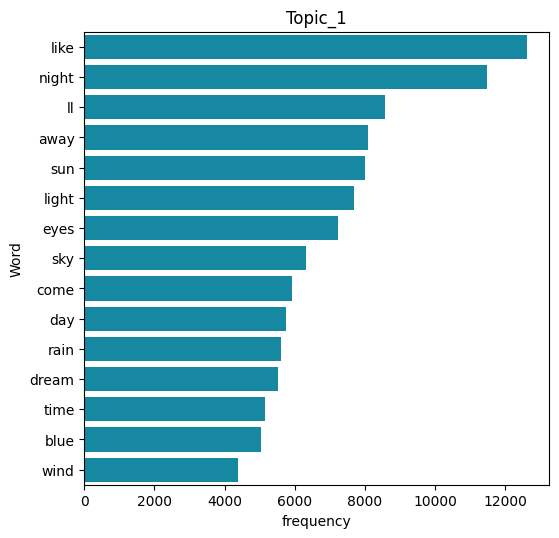

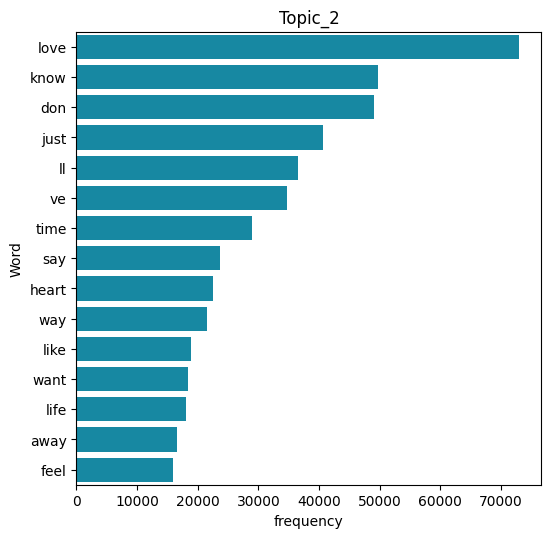

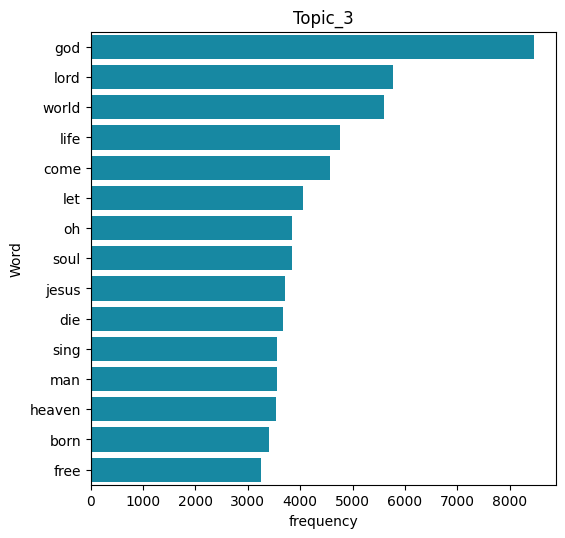

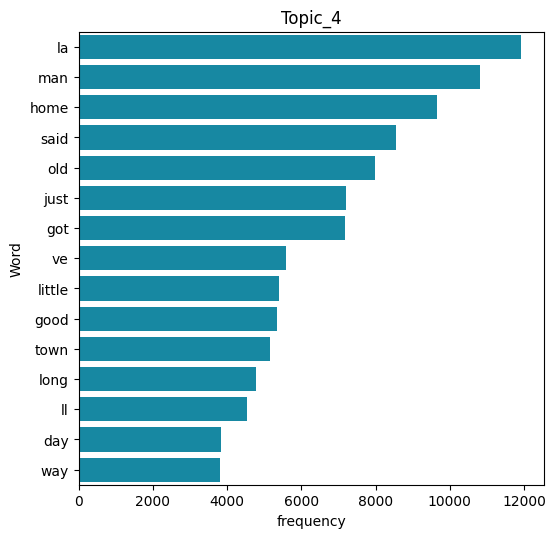

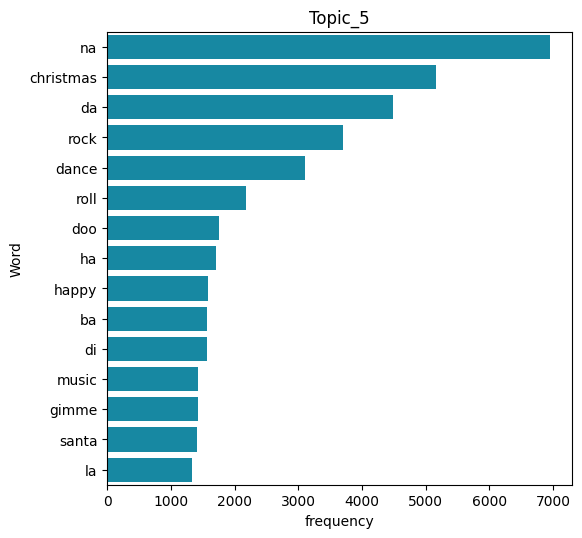

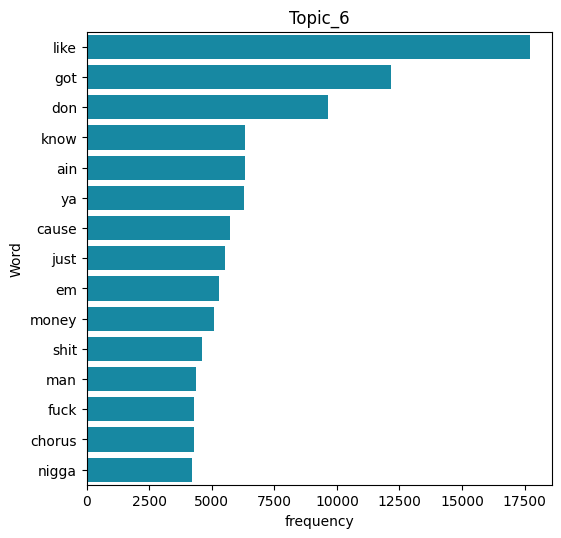

In [22]:
c = 15
words = cv.get_feature_names_out()
n=0
for frequency in LDA.components_:

    topic = pd.DataFrame(data= {'words': words, 'frequency':frequency})
    topic = topic.sort_values(by='frequency',ascending=False)
    topic.reset_index(drop=True)

    plt.figure(figsize=(6,6), dpi=100)
    sns.barplot(data=topic.head(c), y='words', x='frequency', color=color)
    plt.title(f'Topic_{n}', **font)
    plt.ylabel('Word', **font)
    plt.xlabel('frequency', **font)
    
    plt.savefig(f'pics/Spotify_Topic_{n}_WordBar', bbox_inches = "tight", dpi=300);
    
    n=n+1

In [23]:
n = 0
for topic in LDA.components_:
    print(f"Topic_{n} : {keys[topic.argsort()][-15:]}")
    
    print('\n')
    n+=1

Topic_0 : ['wanna' 'like' 'hey' 'know' 'girl' 'come' 'let' 'love' 'want' 'got' 'don'
 'gonna' 'yeah' 'baby' 'oh']


Topic_1 : ['wind' 'blue' 'time' 'dream' 'rain' 'day' 'come' 'sky' 'eyes' 'light'
 'sun' 'away' 'll' 'night' 'like']


Topic_2 : ['feel' 'away' 'life' 'want' 'like' 'way' 'heart' 'say' 'time' 've' 'll'
 'just' 'don' 'know' 'love']


Topic_3 : ['free' 'born' 'heaven' 'man' 'sing' 'die' 'jesus' 'soul' 'oh' 'let'
 'come' 'life' 'world' 'lord' 'god']


Topic_4 : ['way' 'day' 'll' 'long' 'town' 'good' 'little' 've' 'got' 'just' 'old'
 'said' 'home' 'man' 'la']


Topic_5 : ['la' 'santa' 'gimme' 'music' 'di' 'ba' 'happy' 'ha' 'doo' 'roll' 'dance'
 'rock' 'da' 'christmas' 'na']


Topic_6 : ['nigga' 'chorus' 'fuck' 'man' 'shit' 'money' 'em' 'just' 'cause' 'ya'
 'ain' 'know' 'don' 'got' 'like']




In [24]:
data['topic_raw'] = LDA.transform(dtm).argmax(axis=1)

In [25]:
topics = {0: 'Subject of Courtship'
          , 1: 'Nature'
          , 2: 'Love'
          , 3: 'Divine'
          , 4: 'Locational'
          , 5: 'Holidays'
          , 6: 'Rap Music'
         }

In [26]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  topic_raw  \
0  Look at her face, it's a wonderful face  \r\nA...          2   
1  Take it easy with me, please  \r\nTouch me gen...          0   
2  I'll never know why I had to go  \r\nWhy I had...          2   
3  Making somebody happy is a question of give an...          5   
4  Making somebody happy is a question of give an...          2   

                  topic  
0                  Love  
1  Subject of Courtship  
2                  Love  
3              Holidays  
4                  Love

In [27]:
n = 250
sample =  data.sample(2, random_state=1)
for topic, text, song, artist in zip(sample.topic, sample.text, sample.song, sample.artist):
    print(topic, end='\n\n')
    print(text[:n], end='\n\n')
    print(f'Song : {song} by {artist}', end='\n\n')
    print('='*50)

Locational

They're really rockin' Boston  
In Pittsburgh, P. A.  
Deep in the heart of Texas  
And 'round the Frisco Bay  
All over St. Louis  
And down in New Orleans  
All the cats want to dance with  
Sweet little sixteen  
  
Sweet little sixteen  

Song : Sweet Little Sixteen by Chuck Berry

Love

All my love  
Came to nothin' at all my love  
When I woke up to find  
You were no longer mine  
All my love  
Throw away after all this time  
Now there's no place for me  
In the future you see  
I don't understand you  
I've done all I c

Song : All My Love by Cliff Richard



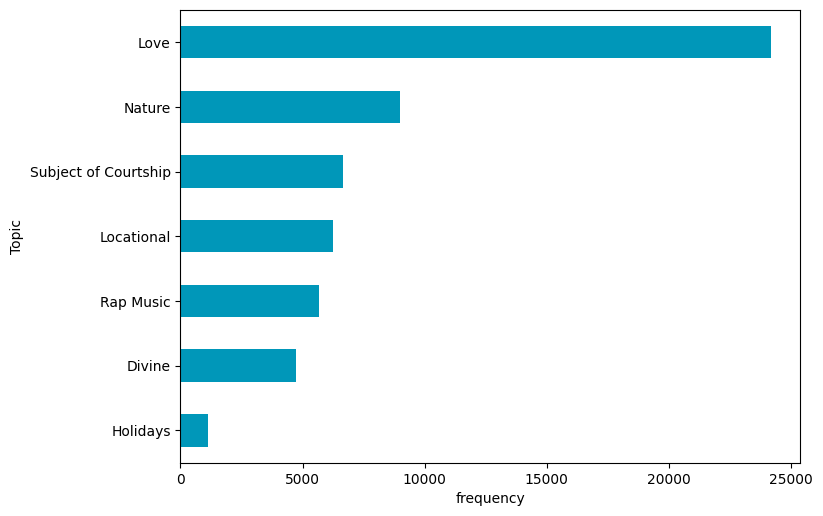

In [28]:
plt.figure(figsize=(8,6), dpi=100)
data.topic.value_counts().plot.barh(color=color).invert_yaxis()
plt.ylabel('Topic',**font)
plt.xlabel('frequency', **font)
plt.savefig('pics/Spotify_Topic_Hierarchy', bbox_inches='tight');

### NMF

In [29]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(data.text)

In [30]:
nmf_model = NMF(n_components=7,random_state=42, verbose=1, max_iter=1000)
nmf_model.fit(dtm)

C:\Users\alexandru.parvu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


violation: 1.0
violation: 0.6094456813255171
violation: 0.39255930163514685
violation: 0.2821797529379084
violation: 0.21209811571348533
violation: 0.15796156832025104
violation: 0.12170034455051063
violation: 0.09753055044773142
violation: 0.07985638936235832
violation: 0.06722333939146616
violation: 0.058030278681715224
violation: 0.04995095966941
violation: 0.04294987784260896
violation: 0.03772576926406213
violation: 0.033469913975141076
violation: 0.02981834347473299
violation: 0.02663103765822023
violation: 0.023843365647561766
violation: 0.021308360518594617
violation: 0.019042491611469682
violation: 0.017028475582817906
violation: 0.015201094235920504
violation: 0.013543089819308624
violation: 0.012004364455189794
violation: 0.01055404649411525
violation: 0.009064911966244099
violation: 0.008023855873486538
violation: 0.007132173178491571
violation: 0.006371472011159891
violation: 0.005721450160999916
violation: 0.0051642223099978846
violation: 0.004680525047437645
violation: 0

NMF(max_iter=1000, n_components=7, random_state=42, verbose=1)

In [32]:
print(tfidf.get_feature_names_out().shape, nmf_model.components_[0].shape)
keys = tfidf.get_feature_names_out()

(40546,) (40546,)


In [33]:
topics = []
for topic in nmf_model.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

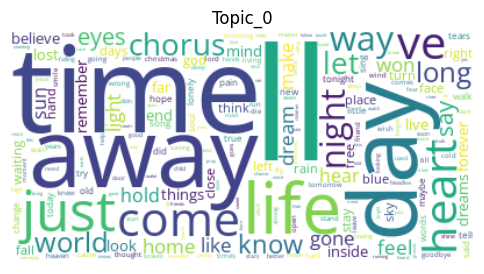

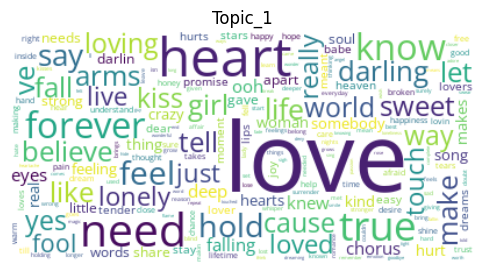

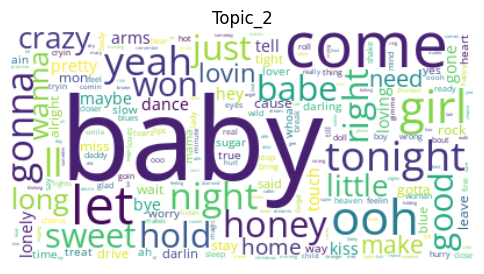

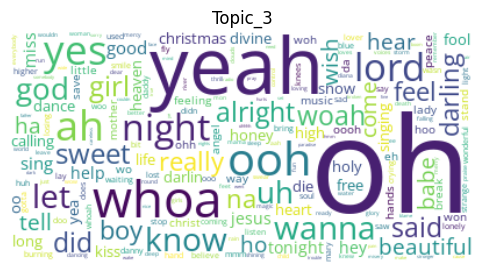

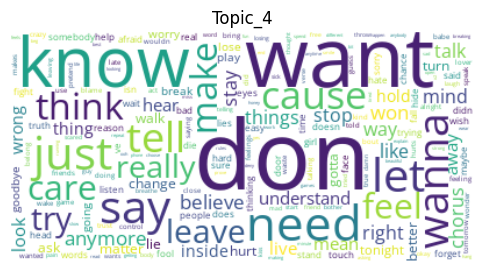

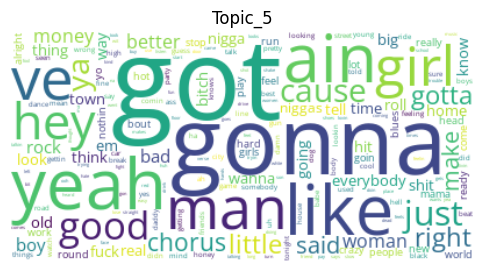

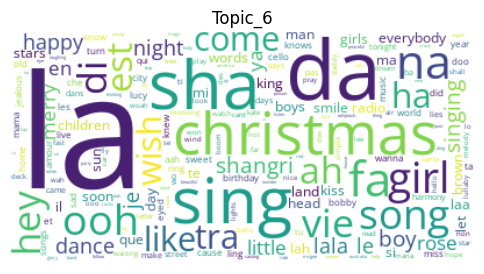

In [34]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42)
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f'Topic_{n}',**font)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

In [37]:
n = 0
for topic in LDA.components_:
    print(n)
    print(keys[topic.argsort()][-15:])
    print('\n')
    n+=1

0
['wanna' 'like' 'hey' 'know' 'girl' 'come' 'let' 'love' 'want' 'got' 'don'
 'gonna' 'yeah' 'baby' 'oh']


1
['wind' 'blue' 'time' 'dream' 'rain' 'day' 'come' 'sky' 'eyes' 'light'
 'sun' 'away' 'll' 'night' 'like']


2
['feel' 'away' 'life' 'want' 'like' 'way' 'heart' 'say' 'time' 've' 'll'
 'just' 'don' 'know' 'love']


3
['free' 'born' 'heaven' 'man' 'sing' 'die' 'jesus' 'soul' 'oh' 'let'
 'come' 'life' 'world' 'lord' 'god']


4
['way' 'day' 'll' 'long' 'town' 'good' 'little' 've' 'got' 'just' 'old'
 'said' 'home' 'man' 'la']


5
['la' 'santa' 'gimme' 'music' 'di' 'ba' 'happy' 'ha' 'doo' 'roll' 'dance'
 'rock' 'da' 'christmas' 'na']


6
['nigga' 'chorus' 'fuck' 'man' 'shit' 'money' 'em' 'just' 'cause' 'ya'
 'ain' 'know' 'don' 'got' 'like']




In [38]:
data['topic_raw'] = LDA.transform(dtm).argmax(axis=1)

In [39]:
topics = {0: 'Woman'
          , 1: 'Nature'
          , 2: 'Love'
          , 3: 'Religion'
          , 4: 'Home'
          , 5: 'Holiday'
          , 6: 'Gangster Stuff'
         }

In [40]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  topic_raw  \
0  Look at her face, it's a wonderful face  \r\nA...          2   
1  Take it easy with me, please  \r\nTouch me gen...          1   
2  I'll never know why I had to go  \r\nWhy I had...          6   
3  Making somebody happy is a question of give an...          5   
4  Making somebody happy is a question of give an...          5   

            topic  
0            Love  
1          Nature  
2  Gangster Stuff  
3         Holiday  
4         Holiday

In [41]:
sample =  data.sample(2)
for topic, text in zip(sample.topic, sample.text):
    print(topic)
    print(text, end='\n\n')

Nature
Hey, hey  
Hey, hey  
  
In my rearview mirror  
My life is getting clearer  
The sunset sighs and slowly disappears  
These trinkets once were treasure  
Life changes like the weather  
You grow up, grow old, or you hit the road 'round here  
So I drive (Drive, drive)  
Watching white lines passing by  
With my plastic dashboard Jesus  
Waiting there to greet us  
  
[Chorus:]  
Hey, hey  
I finally found my way  
Said goodbye to yesterday  
Hit the gas, there ain't no brakes on this lost highway  
Yeah, I'm busting loose, I'm lettin' go  
Out on this open road  
It's independence day on this lost highway  
Hey, hey  
Hey, hey  
  
Don't know where I'm going  
But I know where I've been  
I'm afraid of going back again  
So I drive (Drive, drive)  
Years and miles are flying by  
And waiting there to greet us  
Is my plastic dashboard Jesus  
  
[Chorus]  
  
Oh patron saint of lonely souls  
Tell this boy which way to go  
Guide the car, you've got the keys  
Farewell to medio

# Women's Clothing

In [42]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv').dropna()
data.drop('Unnamed: 0', inplace=True, axis=1)
data.head()

Clothing ID  Age                    Title  \
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   
5         1080   49  Not for the very petite   
6          858   39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits

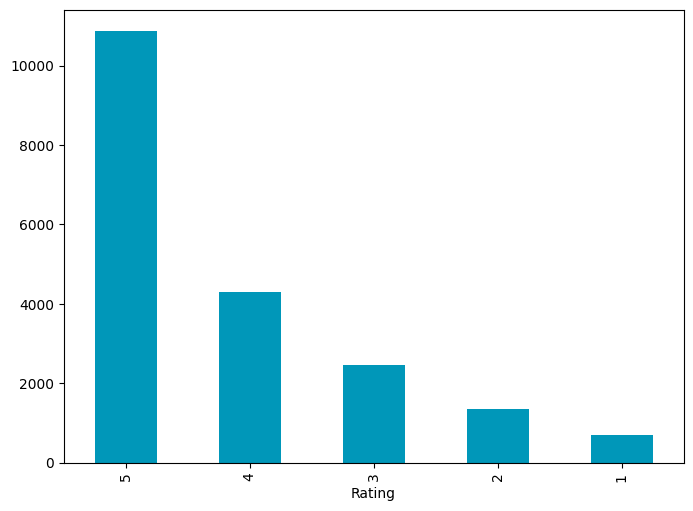

In [43]:
plt.figure(figsize=(8,6), dpi=100)
data.Rating.value_counts().plot.bar(color=color)
plt.xlabel('Rating', **font)
plt.savefig('pics/womens_rating_distribution',  bbox_inches='tight');

In [44]:
data['positive_rating'] = data.Rating.apply(lambda x: x>=4)

Of course there is no topic to the artical or category for that matter thus we would need to set it ourselves 

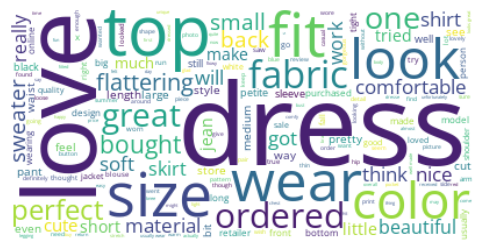

In [45]:
# Get all the text
text_data = data['Review Text'].astype(str)
text = ' '.join(text_data)
wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42).generate(text)

# Plot Word Cloud
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig('pics/womens_wordcloud', bbox_inches='tight');

In [46]:
no_words = len(text.split())
print(f'No Words {no_words},  Bible count: {no_words/no_bible_words}')

No Words 1221308,  Bible count: 1.5127161207935484


## Preprocessing

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [47]:
cv = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
dtm = cv.fit_transform(data['Review Text'])

## Fitting the Data

### LDA

In [48]:
LDA = LatentDirichletAllocation(n_components=7
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=100).fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

In [49]:
print(cv.get_feature_names_out().shape, LDA.components_.shape)
keys = cv.get_feature_names_out()

(3052,) (7, 3052)


In [50]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

### Word Frequency Word Cloud

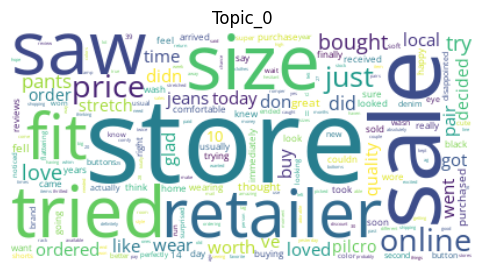

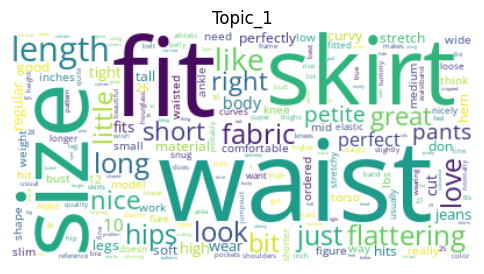

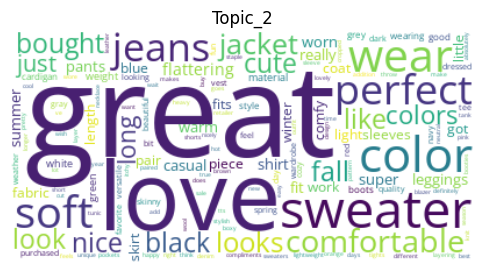

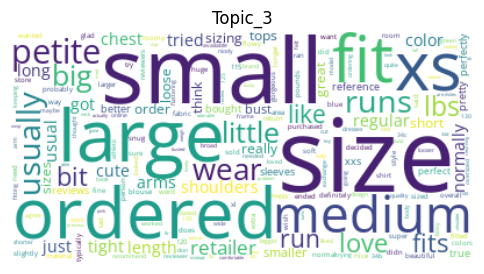

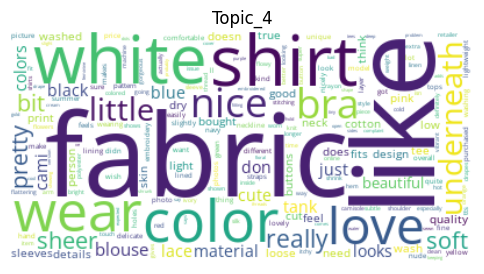

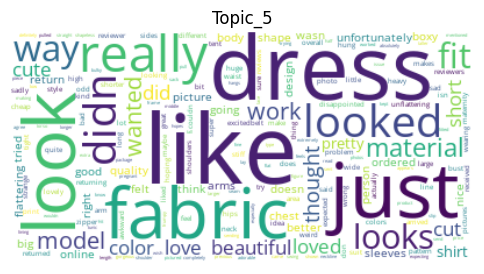

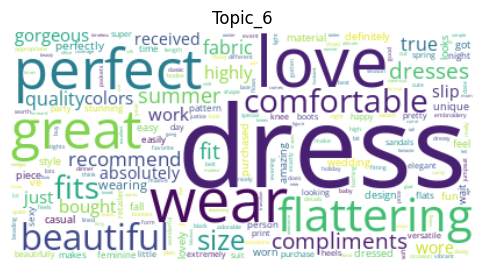

In [51]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42)
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f'Topic_{n}', **font)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

### Word Frequency Barplot

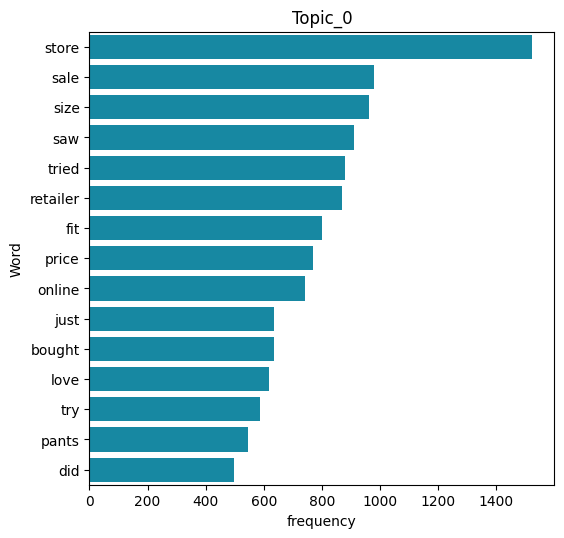

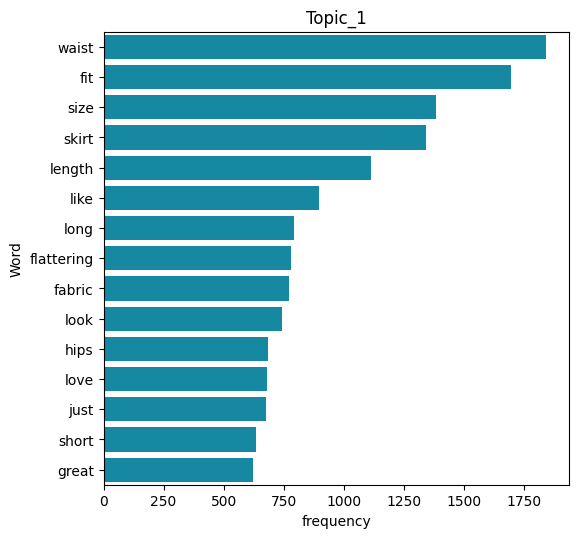

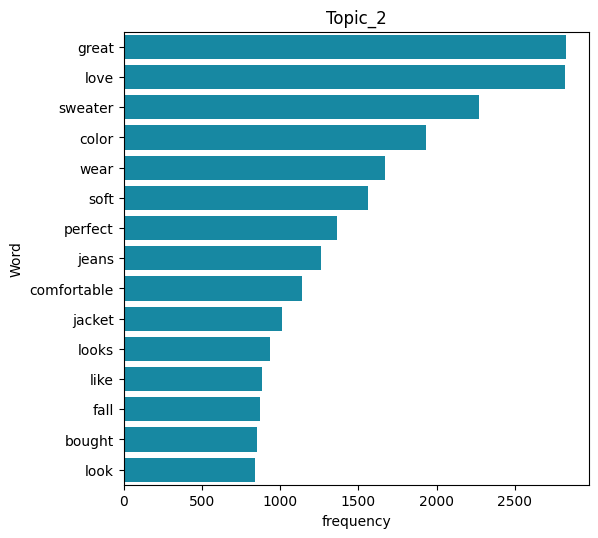

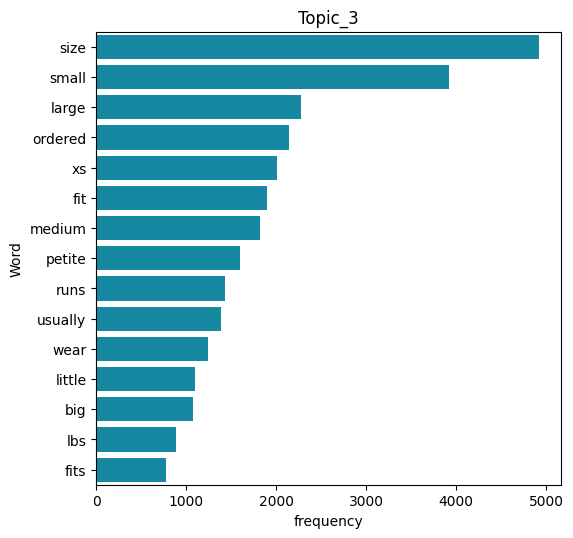

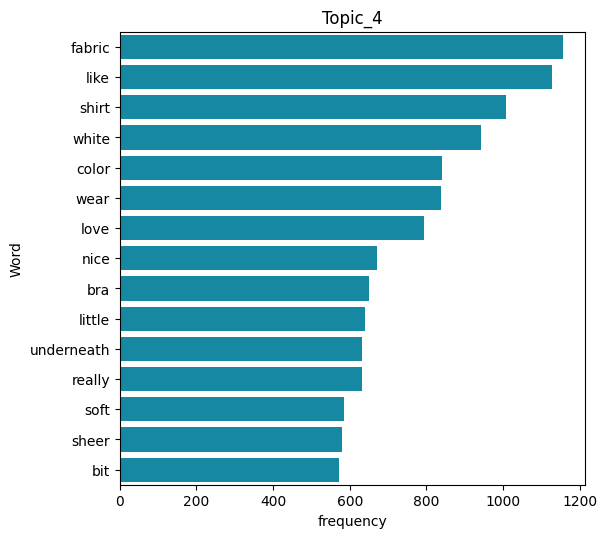

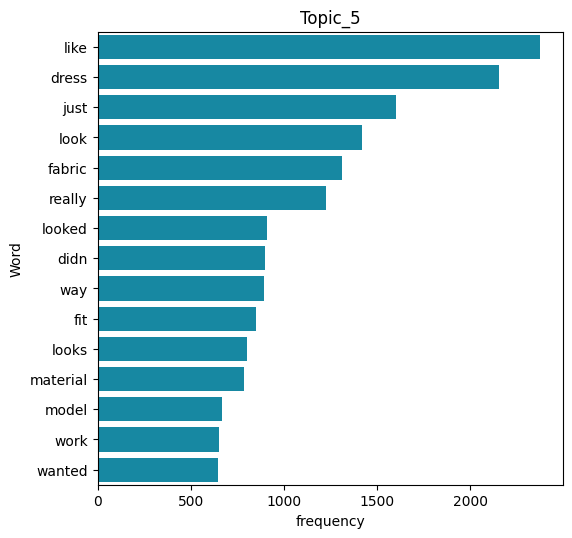

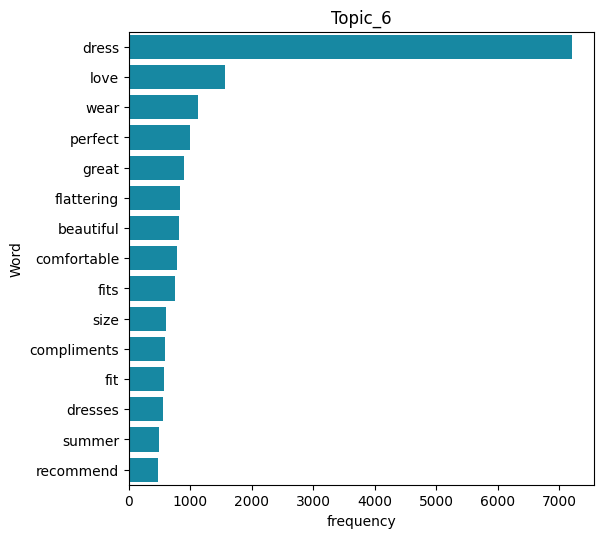

In [52]:
c = 15
words = cv.get_feature_names_out()
n=0
for frequency in LDA.components_:

    topic = pd.DataFrame(data= {'words': words, 'frequency':frequency})
    topic = topic.sort_values(by='frequency',ascending=False)
    topic.reset_index(drop=True)

    plt.figure(figsize=(6,6), dpi=100)
    sns.barplot(data=topic.head(c), y='words', x='frequency', color=color)
    plt.title(f'Topic_{n}',**font)
    plt.ylabel('Word',**font)
    plt.xlabel('frequency', **font)
    
    plt.savefig(f'pics/Womens_Topic_{n}_WordBar', bbox_inches = "tight", dpi=300);
    
    n=n+1

In [53]:
n = 0
for topic in LDA.components_:
    value = keys[topic.argsort()][-20:] 
    value = list(value)
    print(f'Topic_{n} : {value}')
    print('\n')
    n+=1

Topic_0 : ['don', 'ordered', 'went', 'got', 'jeans', 'did', 'pants', 'try', 'love', 'bought', 'just', 'online', 'price', 'fit', 'retailer', 'tried', 'saw', 'size', 'sale', 'store']


Topic_1 : ['petite', 'bit', 'right', 'nice', 'little', 'great', 'short', 'just', 'love', 'hips', 'look', 'fabric', 'flattering', 'long', 'like', 'length', 'skirt', 'size', 'fit', 'waist']


Topic_2 : ['long', 'colors', 'cute', 'nice', 'black', 'look', 'bought', 'fall', 'like', 'looks', 'jacket', 'comfortable', 'jeans', 'perfect', 'soft', 'wear', 'color', 'sweater', 'love', 'great']


Topic_3 : ['retailer', 'run', 'like', 'love', 'bit', 'fits', 'lbs', 'big', 'little', 'wear', 'usually', 'runs', 'petite', 'medium', 'fit', 'xs', 'ordered', 'large', 'small', 'size']


Topic_4 : ['looks', 'colors', 'material', 'blouse', 'pretty', 'bit', 'sheer', 'soft', 'really', 'underneath', 'little', 'bra', 'nice', 'love', 'wear', 'color', 'white', 'shirt', 'like', 'fabric']


Topic_5 : ['cut', 'cute', 'loved', 'beautiful', 

In [54]:
topics = {0: 'Sale'
          , 1: 'Size'
          , 2: 'Confort'
          , 3: 'Small Sizes'
          , 4: 'Material and Color'
          , 5: 'Appearance'
          , 6: 'Dresses'
         }

In [55]:
data['topic_raw'] = LDA.transform(dtm).argmax(axis=1)
# data[['Review Text', 'topic_raw']]
data

Clothing ID  Age                                              Title  \
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
5             1080   49                            Not for the very petite   
6              858   39                               Cagrcoal shimmer fun   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
5      I love tracy reese dresses, but this one is no...       2   
6      I aded this in my basket at hte last mintue to...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
5                    0                        4         General   
6                    1                        1  General Petite   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  positive_rating  topic_raw  
2             Dresses    Dresses            False          3  
3             Bottoms      Pants             True          6  
4                Tops    Blouses             True          2  
5             Dresses    Dresses            False          1  
6                Tops      Knits             True          3  
...               ...        ...              ...        ...  
23481         Dresses    Dresses             True          6  
23482            Tops      Knits            False          5  
23483         Dresses    Dresses            False          0  
23484         Dresses    Dresses            False          5  
23485         Dresses    Dresses             True          6  

[19662 rows x 12 columns]

In [56]:
data['topic'] = data.topic_raw.apply(lambda x: topics[x])
data[['Review Text', 'topic_raw', 'topic']]

Review Text  topic_raw  \
2      I had such high hopes for this dress and reall...          3   
3      I love, love, love this jumpsuit. it's fun, fl...          6   
4      This shirt is very flattering to all due to th...          2   
5      I love tracy reese dresses, but this one is no...          1   
6      I aded this in my basket at hte last mintue to...          3   
...                                                  ...        ...   
23481  I was very happy to snag this dress at such a ...          6   
23482  It reminds me of maternity clothes. soft, stre...          5   
23483  This fit well, but the top was very see throug...          0   
23484  I bought this dress for a wedding i have this ...          5   
23485  This dress in a lovely platinum is feminine an...          6   

             topic  
2      Small Sizes  
3          Dresses  
4          Confort  
5             Size  
6      Small Sizes  
...            ...  
23481      Dresses  
23482   Appearance  
23483         Sale  
23484   Appearance  
23485      Dresses  

[19662 rows x 3 columns]

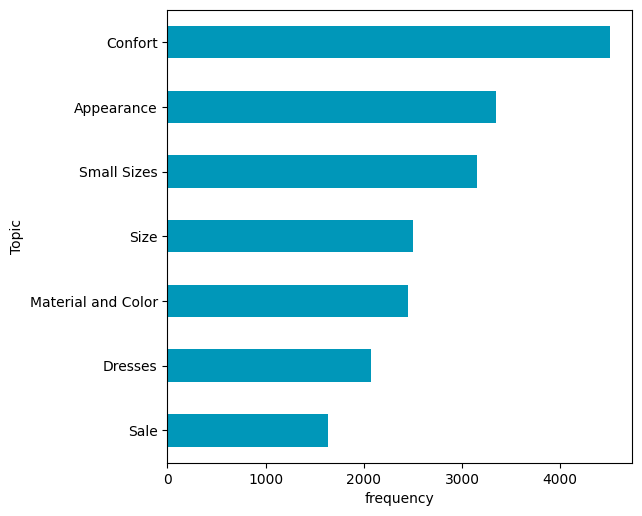

In [65]:
plt.figure(figsize=(6,6), dpi=100)
data.topic.value_counts().plot.barh(color=color)
plt.xlabel('frequency',**font)
plt.ylabel('Topic', **font)
plt.gca().invert_yaxis()
plt.savefig('pics/womens_topic_frequency', pad_inches='tight');

In [66]:
sample =  data.sample(2)
for topic, text in zip(sample['topic'], sample['Review Text']):
    print(topic, end='\n\n')
    print(text, end='\n\n')
    print("="*50)

Material and Color

I sew and therefore i can tell when something is cut and designed well. this top hangs beautifully and the colors are very pretty. it's cotton.

Small Sizes

I don't usually write reviews but this one definitely needs it. i bought this shirt in the wine color in a small. i'm 5'6" 135lbs and usually wear a small in retailer clothing. loved the color and fit of this shirt, a little longer and loose with unique detailing on the sides. i loved the wine color so much i bought the gray and white stripe one as well. when i bought the gray and white one i had to try on 5-6 smalls before finding one that fit just right. there was a significant difference in the



### LDA by positive and negative retaing

#### Positive

In [67]:
positive = data[data.positive_rating].copy()
positive = positive.reset_index(drop=True)
positive

Clothing ID  Age                                 Title  \
0             1049   50                      My favorite buy!   
1              847   47                      Flattering shirt   
2              858   39                  Cagrcoal shimmer fun   
3              858   39  Shimmer, surprisingly goes with lots   
4             1077   24                            Flattering   
...            ...  ...                                   ...   
15142          522   27                               Cheeky!   
15143         1094   39                            Entrancing   
15144         1005   42                     What a fun piece!   
15145         1104   34        Great dress for many occasions   
15146         1104   52       Please make more like this one!   

                                             Review Text  Rating  \
0      I love, love, love this jumpsuit. it's fun, fl...       5   
1      This shirt is very flattering to all due to th...       5   
2      I aded this in my basket at hte last mintue to...       5   
3      I ordered this in carbon for store pick up, an...       4   
4      I love this dress. i usually get an xs but it ...       5   
...                                                  ...     ...   
15142  These bottoms are very cute but defiantly chee...       4   
15143  I'm so impressed with the beautiful color comb...       4   
15144  So i wasn't sure about ordering this skirt bec...       5   
15145  I was very happy to snag this dress at such a ...       5   
15146  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0  General Petite   
1                    1                        6         General   
2                    1                        1  General Petite   
3                    1                        4  General Petite   
4                    1                        0         General   
...                ...                      ...             ...   
15142                1                        0       Initmates   
15143                1                        5  General Petite   
15144                1                        0  General Petite   
15145                1                        0  General Petite   
15146                1                       22  General Petite   

      Department Name Class Name  positive_rating  topic_raw  \
0             Bottoms      Pants             True          6   
1                Tops    Blouses             True          2   
2                Tops      Knits             True          3   
3                Tops      Knits             True          2   
4             Dresses    Dresses             True          3   
...               ...        ...              ...        ...   
15142        Intimate       Swim             True          1   
15143         Dresses    Dresses             True          4   
15144         Bottoms     Skirts             True          1   
15145         Dresses    Dresses             True          6   
15146         Dresses    Dresses             True          6   

                    topic  
0                 Dresses  
1                 Confort  
2             Small Sizes  
3                 Confort  
4             Small Sizes  
...                   ...  
15142                Size  
15143  Material and Color  
15144                Size  
15145             Dresses  
15146             Dresses  

[15147 rows x 13 columns]

In [68]:
cv = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
dtm = cv.fit_transform(positive['Review Text'])

##### LDA

In [69]:
LDA = LatentDirichletAllocation(n_components=4
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=100).fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

In [70]:
print(cv.get_feature_names_out().shape, LDA.components_.shape)
keys = cv.get_feature_names_out()

(2607,) (4, 2607)


In [71]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

##### Word Frequency Word Cloud

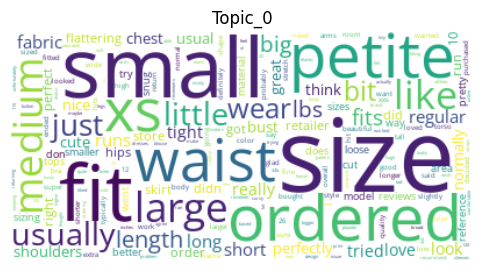

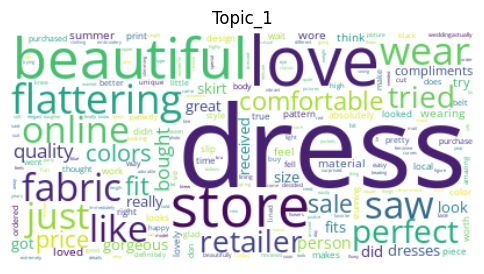

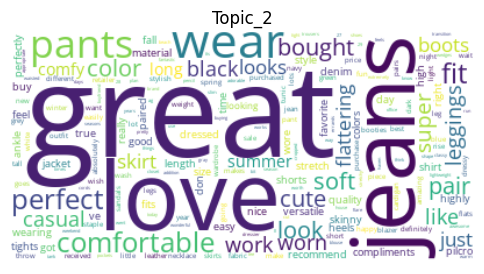

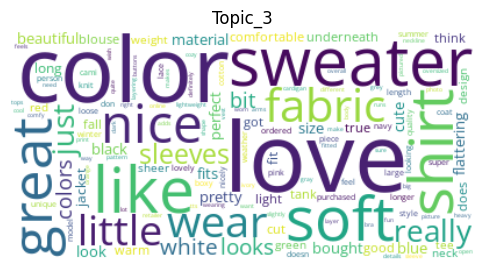

In [72]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42)
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f'Topic_{n}', **font)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

##### Word Frequency Barplot

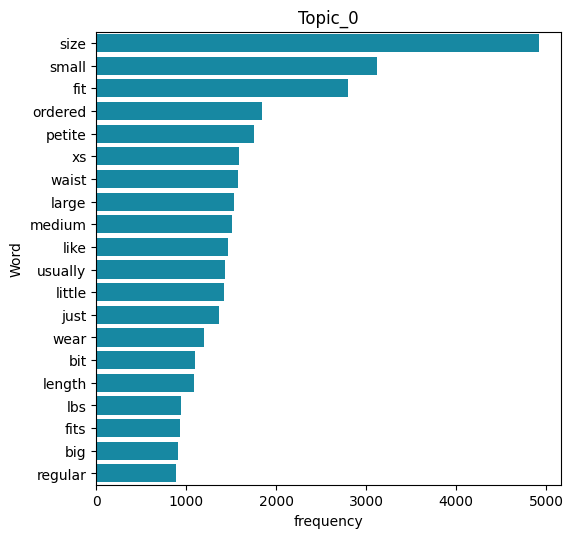

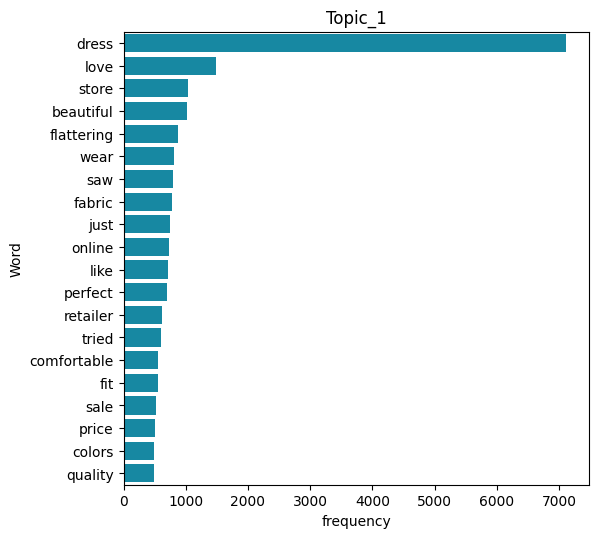

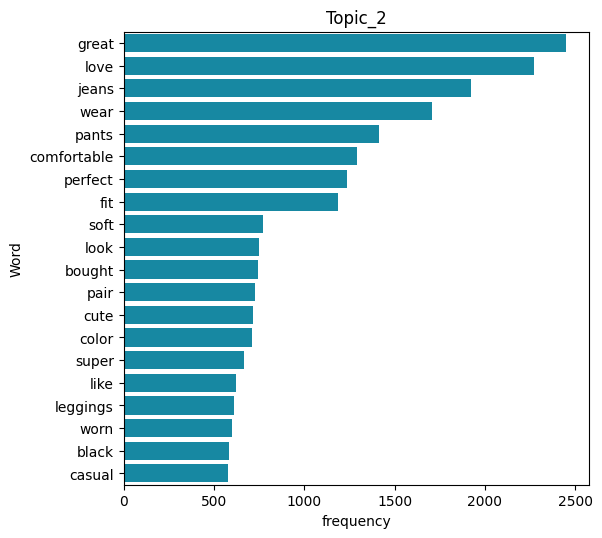

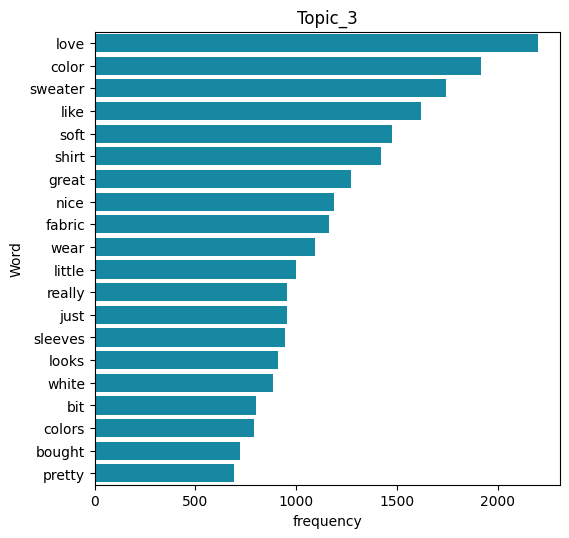

In [76]:
c = 20
words = cv.get_feature_names_out()
n=0
for frequency in LDA.components_:

    topic = pd.DataFrame(data= {'words': words, 'frequency':frequency})
    topic = topic.sort_values(by='frequency',ascending=False)
    topic.reset_index(drop=True)

    plt.figure(figsize=(6,6), dpi=100)
    sns.barplot(data=topic.head(c), y='words', x='frequency', color=color)
    plt.title(f'Topic_{n}',**font)
    plt.ylabel('Word',**font)
    plt.xlabel('frequency', **font)
    
    plt.savefig(f'pics/Womens_Topic_{n}_WordBar', bbox_inches = "tight", dpi=300);
    
    n=n+1

In [77]:
n = 0
for topic in LDA.components_:
    value = keys[topic.argsort()][-20:] 
    value = list(value)
    print(f'Topic_{n} : {value}')
    print('\n')
    n+=1

Topic_0 : ['regular', 'big', 'fits', 'lbs', 'length', 'bit', 'wear', 'just', 'little', 'usually', 'like', 'medium', 'large', 'waist', 'xs', 'petite', 'ordered', 'fit', 'small', 'size']


Topic_1 : ['quality', 'colors', 'price', 'sale', 'fit', 'comfortable', 'tried', 'retailer', 'perfect', 'like', 'online', 'just', 'fabric', 'saw', 'wear', 'flattering', 'beautiful', 'store', 'love', 'dress']


Topic_2 : ['casual', 'black', 'worn', 'leggings', 'like', 'super', 'color', 'cute', 'pair', 'bought', 'look', 'soft', 'fit', 'perfect', 'comfortable', 'pants', 'wear', 'jeans', 'love', 'great']


Topic_3 : ['pretty', 'bought', 'colors', 'bit', 'white', 'looks', 'sleeves', 'just', 'really', 'little', 'wear', 'fabric', 'nice', 'great', 'shirt', 'soft', 'like', 'sweater', 'color', 'love']




In [78]:
topics = {0: 'Small Sizes Fitting'
          , 1: 'Price to Quality Ratio'
          , 2: 'Casual Clothing'
          , 3: 'Appearance'
         }

In [79]:
positive['topic_raw'] = LDA.transform(dtm).argmax(axis=1)
positive

Clothing ID  Age                                 Title  \
0             1049   50                      My favorite buy!   
1              847   47                      Flattering shirt   
2              858   39                  Cagrcoal shimmer fun   
3              858   39  Shimmer, surprisingly goes with lots   
4             1077   24                            Flattering   
...            ...  ...                                   ...   
15142          522   27                               Cheeky!   
15143         1094   39                            Entrancing   
15144         1005   42                     What a fun piece!   
15145         1104   34        Great dress for many occasions   
15146         1104   52       Please make more like this one!   

                                             Review Text  Rating  \
0      I love, love, love this jumpsuit. it's fun, fl...       5   
1      This shirt is very flattering to all due to th...       5   
2      I aded this in my basket at hte last mintue to...       5   
3      I ordered this in carbon for store pick up, an...       4   
4      I love this dress. i usually get an xs but it ...       5   
...                                                  ...     ...   
15142  These bottoms are very cute but defiantly chee...       4   
15143  I'm so impressed with the beautiful color comb...       4   
15144  So i wasn't sure about ordering this skirt bec...       5   
15145  I was very happy to snag this dress at such a ...       5   
15146  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0  General Petite   
1                    1                        6         General   
2                    1                        1  General Petite   
3                    1                        4  General Petite   
4                    1                        0         General   
...                ...                      ...             ...   
15142                1                        0       Initmates   
15143                1                        5  General Petite   
15144                1                        0  General Petite   
15145                1                        0  General Petite   
15146                1                       22  General Petite   

      Department Name Class Name  positive_rating  topic_raw  \
0             Bottoms      Pants             True          2   
1                Tops    Blouses             True          2   
2                Tops      Knits             True          0   
3                Tops      Knits             True          0   
4             Dresses    Dresses             True          0   
...               ...        ...              ...        ...   
15142        Intimate       Swim             True          0   
15143         Dresses    Dresses             True          0   
15144         Bottoms     Skirts             True          1   
15145         Dresses    Dresses             True          1   
15146         Dresses    Dresses             True          2   

                    topic  
0                 Dresses  
1                 Confort  
2             Small Sizes  
3                 Confort  
4             Small Sizes  
...                   ...  
15142                Size  
15143  Material and Color  
15144                Size  
15145             Dresses  
15146             Dresses  

[15147 rows x 13 columns]

In [80]:
positive['topic'] = positive.topic_raw.apply(lambda x: topics[x])
positive[['Review Text', 'topic_raw', 'topic']]

Review Text  topic_raw  \
0      I love, love, love this jumpsuit. it's fun, fl...          2   
1      This shirt is very flattering to all due to th...          2   
2      I aded this in my basket at hte last mintue to...          0   
3      I ordered this in carbon for store pick up, an...          0   
4      I love this dress. i usually get an xs but it ...          0   
...                                                  ...        ...   
15142  These bottoms are very cute but defiantly chee...          0   
15143  I'm so impressed with the beautiful color comb...          0   
15144  So i wasn't sure about ordering this skirt bec...          1   
15145  I was very happy to snag this dress at such a ...          1   
15146  This dress in a lovely platinum is feminine an...          2   

                        topic  
0             Casual Clothing  
1             Casual Clothing  
2         Small Sizes Fitting  
3         Small Sizes Fitting  
4         Small Sizes Fitting  
...                       ...  
15142     Small Sizes Fitting  
15143     Small Sizes Fitting  
15144  Price to Quality Ratio  
15145  Price to Quality Ratio  
15146         Casual Clothing  

[15147 rows x 3 columns]

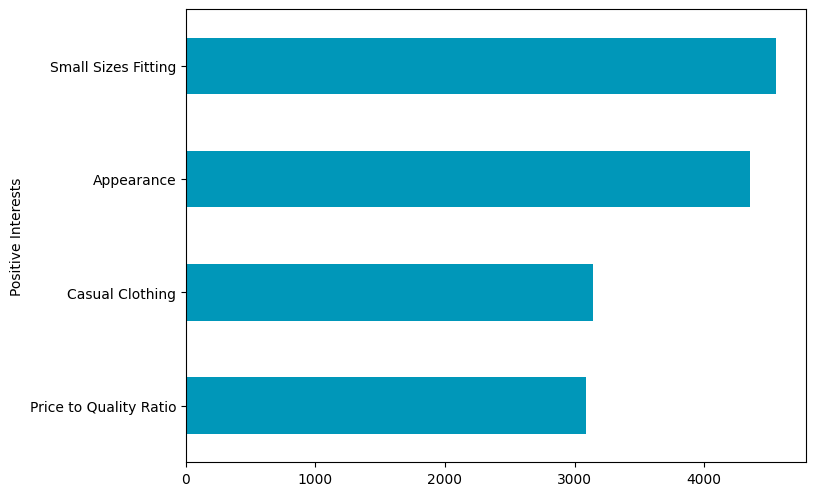

In [81]:
plt.figure(figsize=(8,6), dpi=100)
positive.topic.value_counts().plot.barh(color=color).invert_yaxis()
plt.ylabel('Positive Interests', **font)
plt.savefig('pics/womens_positive_interest', bbox_inches='tight', dpi=450)

In [82]:
sample =  positive.sample(2)
for topic, text in zip(sample['topic'], sample['Review Text']):
    print(topic, end='\n\n')
    print(text, end='\n\n')
    print("="*50)

Small Sizes Fitting

I love this skirt. maybe i love wrap skirts in general, but many miss the mark. this one is just right. it does not have elastic waist band which always makes me look frumpy, instead it is a side zip and allows for the tummy to stay flat as well as the pleats. the embroidery is just enough and you may not be able to see the design of black on black in the fabric which makes the skirt. i usually wear a size 6 but the 8 fit just right, so you may want to size up.

Casual Clothing

Cute, comfy, and would highly recommend them to others. i plan on getting one more color because i feel like i will wear them all the time!



#### Negative

In [83]:
negative = data[data.positive_rating==False].copy()
negative = negative.reset_index(drop=True)
negative

Clothing ID  Age                                              Title  \
0            1077   60                            Some major design flaws   
1            1080   49                            Not for the very petite   
2            1077   53       Dress looks like it's made of cheap material   
3            1077   50                Pretty party dress with some issues   
4            1065   34  You need to be at least average height, or taller   
...           ...  ...                                                ...   
4510         1104   41                                         Cute dress   
4511         1104   32                                       Unflattering   
4512          862   48                         Wish it was made of cotton   
4513         1104   31                              Cute, but see through   
4514         1084   28  Very cute dress, perfect for summer parties an...   

                                            Review Text  Rating  \
0     I had such high hopes for this dress and reall...       3   
1     I love tracy reese dresses, but this one is no...       2   
2     Dress runs small esp where the zipper area run...       3   
3     This is a nice choice for holiday gatherings. ...       3   
4     Material and color is nice.  the leg opening i...       3   
...                                                 ...     ...   
4510  Cute dress but not for me.  the waist is too h...       3   
4511  I was surprised at the positive reviews for th...       1   
4512  It reminds me of maternity clothes. soft, stre...       3   
4513  This fit well, but the top was very see throug...       3   
4514  I bought this dress for a wedding i have this ...       3   

      Recommended IND  Positive Feedback Count   Division Name  \
0                   0                        0         General   
1                   0                        4         General   
2                   0                       14         General   
3                   1                        1         General   
4                   1                        2         General   
...               ...                      ...             ...   
4510                1                        0  General Petite   
4511                0                        0  General Petite   
4512                1                        0  General Petite   
4513                0                        1  General Petite   
4514                1                        2         General   

     Department Name Class Name  positive_rating  topic_raw        topic  
0            Dresses    Dresses            False          3  Small Sizes  
1            Dresses    Dresses            False          1         Size  
2            Dresses    Dresses            False          5   Appearance  
3            Dresses    Dresses            False          3  Small Sizes  
4            Bottoms      Pants            False          1         Size  
...              ...        ...              ...        ...          ...  
4510         Dresses    Dresses            False          5   Appearance  
4511         Dresses    Dresses            False          5   Appearance  
4512            Tops      Knits            False          5   Appearance  
4513         Dresses    Dresses            False          0         Sale  
4514         Dresses    Dresses            False          5   Appearance  

[4515 rows x 13 columns]

In [84]:
cv = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')
dtm = cv.fit_transform(negative['Review Text'])

##### LDA

In [85]:
LDA = LatentDirichletAllocation(n_components=4
                                , random_state=42
                                , n_jobs=-1
                                , verbose=1
                                , max_iter=100).fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

In [86]:
print(cv.get_feature_names_out().shape, LDA.components_.shape)
keys = cv.get_feature_names_out()

(1399,) (4, 1399)


In [87]:
topics = []
for topic in LDA.components_:
    d  = {}
    for key, value in zip(keys, topic):
        d[key] = value
    topics.append(d)

##### Word Frequency Word Cloud

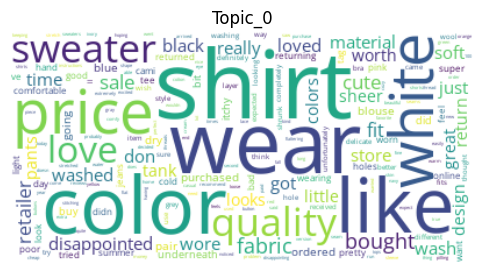

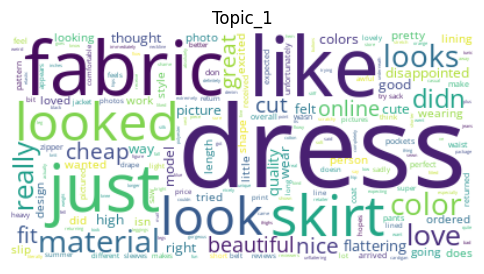

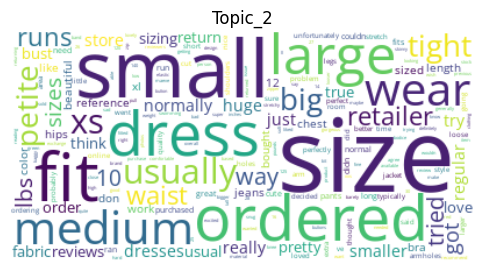

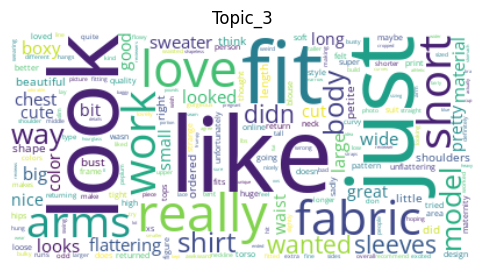

In [88]:
n=0
for topic in topics:
    wordcloud = WordCloud(background_color='white', font_path=font_path, random_state=42)
    wordcloud.generate_from_frequencies(topic)
    plt.figure(figsize=(6,6), dpi=100)
    plt.title(f'Topic_{n}', **font)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");
    n=n+1

##### Word Frequency Barplot

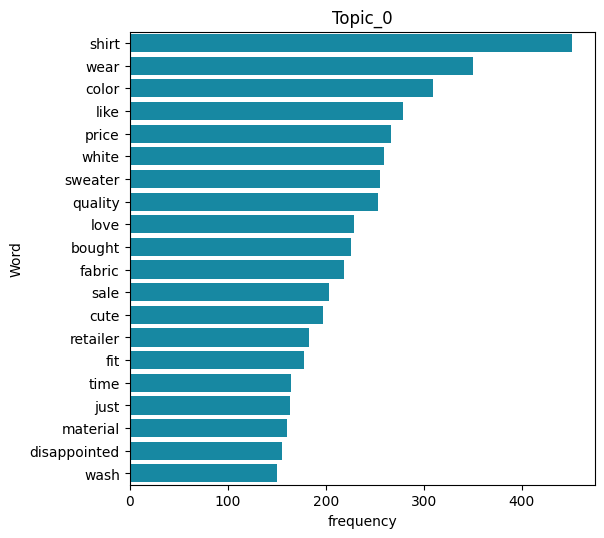

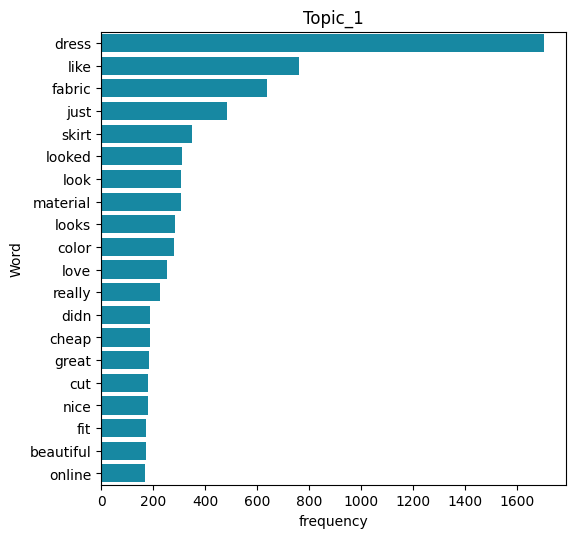

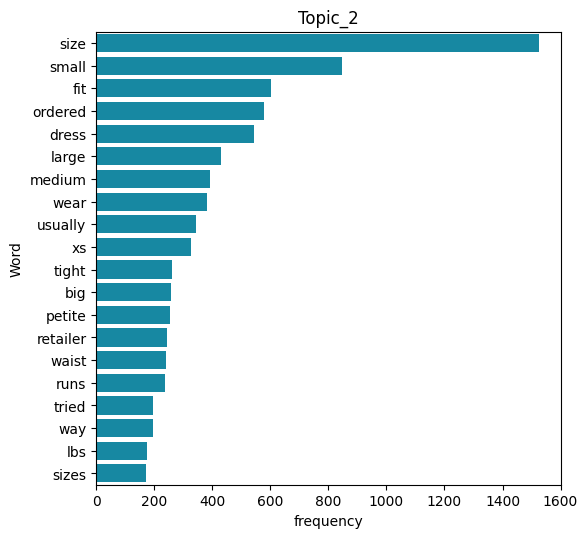

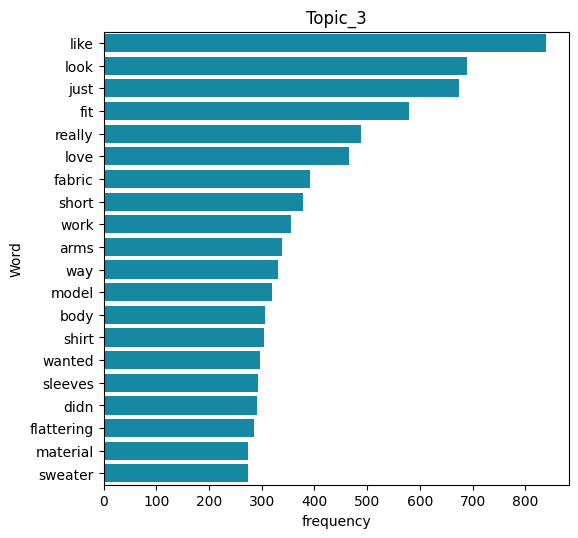

In [90]:
c = 20
words = cv.get_feature_names_out()
n=0
for frequency in LDA.components_:

    topic = pd.DataFrame(data= {'words': words, 'frequency':frequency})
    topic = topic.sort_values(by='frequency',ascending=False)
    topic.reset_index(drop=True)

    plt.figure(figsize=(6,6), dpi=100)
    sns.barplot(data=topic.head(c), y='words', x='frequency', color=color)
    plt.title(f'Topic_{n}',**font)
    plt.ylabel('Word',**font)
    plt.xlabel('frequency', **font)
    
    plt.savefig(f'pics/Womens_Topic_{n}_WordBar', bbox_inches = "tight", dpi=300);
    
    n=n+1

In [91]:
n = 0
for topic in LDA.components_:
    value = keys[topic.argsort()][-20:] 
    value = list(value)
    print(f'Topic_{n} : {value}')
    print('\n')
    n+=1

Topic_0 : ['wash', 'disappointed', 'material', 'just', 'time', 'fit', 'retailer', 'cute', 'sale', 'fabric', 'bought', 'love', 'quality', 'sweater', 'white', 'price', 'like', 'color', 'wear', 'shirt']


Topic_1 : ['online', 'beautiful', 'fit', 'nice', 'cut', 'great', 'cheap', 'didn', 'really', 'love', 'color', 'looks', 'material', 'look', 'looked', 'skirt', 'just', 'fabric', 'like', 'dress']


Topic_2 : ['sizes', 'lbs', 'way', 'tried', 'runs', 'waist', 'retailer', 'petite', 'big', 'tight', 'xs', 'usually', 'wear', 'medium', 'large', 'dress', 'ordered', 'fit', 'small', 'size']


Topic_3 : ['sweater', 'material', 'flattering', 'didn', 'sleeves', 'wanted', 'shirt', 'body', 'model', 'way', 'arms', 'work', 'short', 'fabric', 'love', 'really', 'fit', 'just', 'look', 'like']




In [92]:
topics = {0: "Top Color and Material"
          , 1: "Dress Cheap Fabric"
          , 2: "Larger Small Sizes"
          , 3: "Top Fit and Look"
         }

In [93]:
negative['topic_raw'] = LDA.transform(dtm).argmax(axis=1)
negative

Clothing ID  Age                                              Title  \
0            1077   60                            Some major design flaws   
1            1080   49                            Not for the very petite   
2            1077   53       Dress looks like it's made of cheap material   
3            1077   50                Pretty party dress with some issues   
4            1065   34  You need to be at least average height, or taller   
...           ...  ...                                                ...   
4510         1104   41                                         Cute dress   
4511         1104   32                                       Unflattering   
4512          862   48                         Wish it was made of cotton   
4513         1104   31                              Cute, but see through   
4514         1084   28  Very cute dress, perfect for summer parties an...   

                                            Review Text  Rating  \
0     I had such high hopes for this dress and reall...       3   
1     I love tracy reese dresses, but this one is no...       2   
2     Dress runs small esp where the zipper area run...       3   
3     This is a nice choice for holiday gatherings. ...       3   
4     Material and color is nice.  the leg opening i...       3   
...                                                 ...     ...   
4510  Cute dress but not for me.  the waist is too h...       3   
4511  I was surprised at the positive reviews for th...       1   
4512  It reminds me of maternity clothes. soft, stre...       3   
4513  This fit well, but the top was very see throug...       3   
4514  I bought this dress for a wedding i have this ...       3   

      Recommended IND  Positive Feedback Count   Division Name  \
0                   0                        0         General   
1                   0                        4         General   
2                   0                       14         General   
3                   1                        1         General   
4                   1                        2         General   
...               ...                      ...             ...   
4510                1                        0  General Petite   
4511                0                        0  General Petite   
4512                1                        0  General Petite   
4513                0                        1  General Petite   
4514                1                        2         General   

     Department Name Class Name  positive_rating  topic_raw        topic  
0            Dresses    Dresses            False          2  Small Sizes  
1            Dresses    Dresses            False          1         Size  
2            Dresses    Dresses            False          2   Appearance  
3            Dresses    Dresses            False          2  Small Sizes  
4            Bottoms      Pants            False          3         Size  
...              ...        ...              ...        ...          ...  
4510         Dresses    Dresses            False          3   Appearance  
4511         Dresses    Dresses            False          1   Appearance  
4512            Tops      Knits            False          3   Appearance  
4513         Dresses    Dresses            False          0         Sale  
4514         Dresses    Dresses            False          1   Appearance  

[4515 rows x 13 columns]

In [94]:
negative['topic'] = negative.topic_raw.apply(lambda x: topics[x])
negative[['Review Text', 'topic_raw', 'topic']]

Review Text  topic_raw  \
0     I had such high hopes for this dress and reall...          2   
1     I love tracy reese dresses, but this one is no...          1   
2     Dress runs small esp where the zipper area run...          2   
3     This is a nice choice for holiday gatherings. ...          2   
4     Material and color is nice.  the leg opening i...          3   
...                                                 ...        ...   
4510  Cute dress but not for me.  the waist is too h...          3   
4511  I was surprised at the positive reviews for th...          1   
4512  It reminds me of maternity clothes. soft, stre...          3   
4513  This fit well, but the top was very see throug...          0   
4514  I bought this dress for a wedding i have this ...          1   

                       topic  
0         Larger Small Sizes  
1         Dress Cheap Fabric  
2         Larger Small Sizes  
3         Larger Small Sizes  
4           Top Fit and Look  
...                      ...  
4510        Top Fit and Look  
4511      Dress Cheap Fabric  
4512        Top Fit and Look  
4513  Top Color and Material  
4514      Dress Cheap Fabric  

[4515 rows x 3 columns]

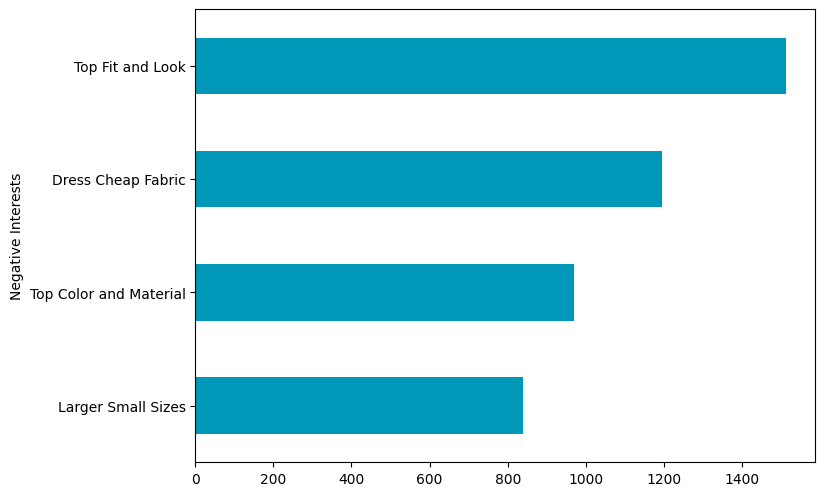

In [95]:
plt.figure(figsize=(8,6), dpi=100)
negative.topic.value_counts().plot.barh(color=color).invert_yaxis()
plt.ylabel('Negative Interests',**font)
plt.savefig('pics/womens_negative_interest', bbox_inches='tight', dpi=450)

In [96]:
sample =  negative.sample(2)
for topic, text in zip(sample['topic'], sample['Review Text']):
    print(topic, end='\n\n')
    print(text, end='\n\n')
    print("="*50)

Dress Cheap Fabric

This is another item i've been stalking that i thought miraculously made it to sale with my size still available. i ordered online but when it arrived i have to be honest i didn't even try it on because i knew it would be going back. the beautiful print online looks really cheap irl on the flimsy fabric. the beaded detail on neck is basically a low grade sequin trim. so much potential just executed poorly.

Dress Cheap Fabric

I love sundry and their fun designs--i was disappointed because the fabric is very thin and the dark part of the heart is not black but bluish slate grey. it is just not what i expected from the picture. i bought the xs and it felt baggy on the body.

